#Data acquization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##import liab

In [ ]:
#import liabrieries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#spiliting data
from sklearn.model_selection import train_test_split

#SMOTE & undersample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# liaberieries dealing with SCALING
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#metrics
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.pipeline import make_pipeline

#MODELS
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, train_test_split

##read data

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/‏مستند من Marian Saad")
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

#Data Exploration

##Describtion

In [ ]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.describe(include='all')


Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

## Plotting the distribution

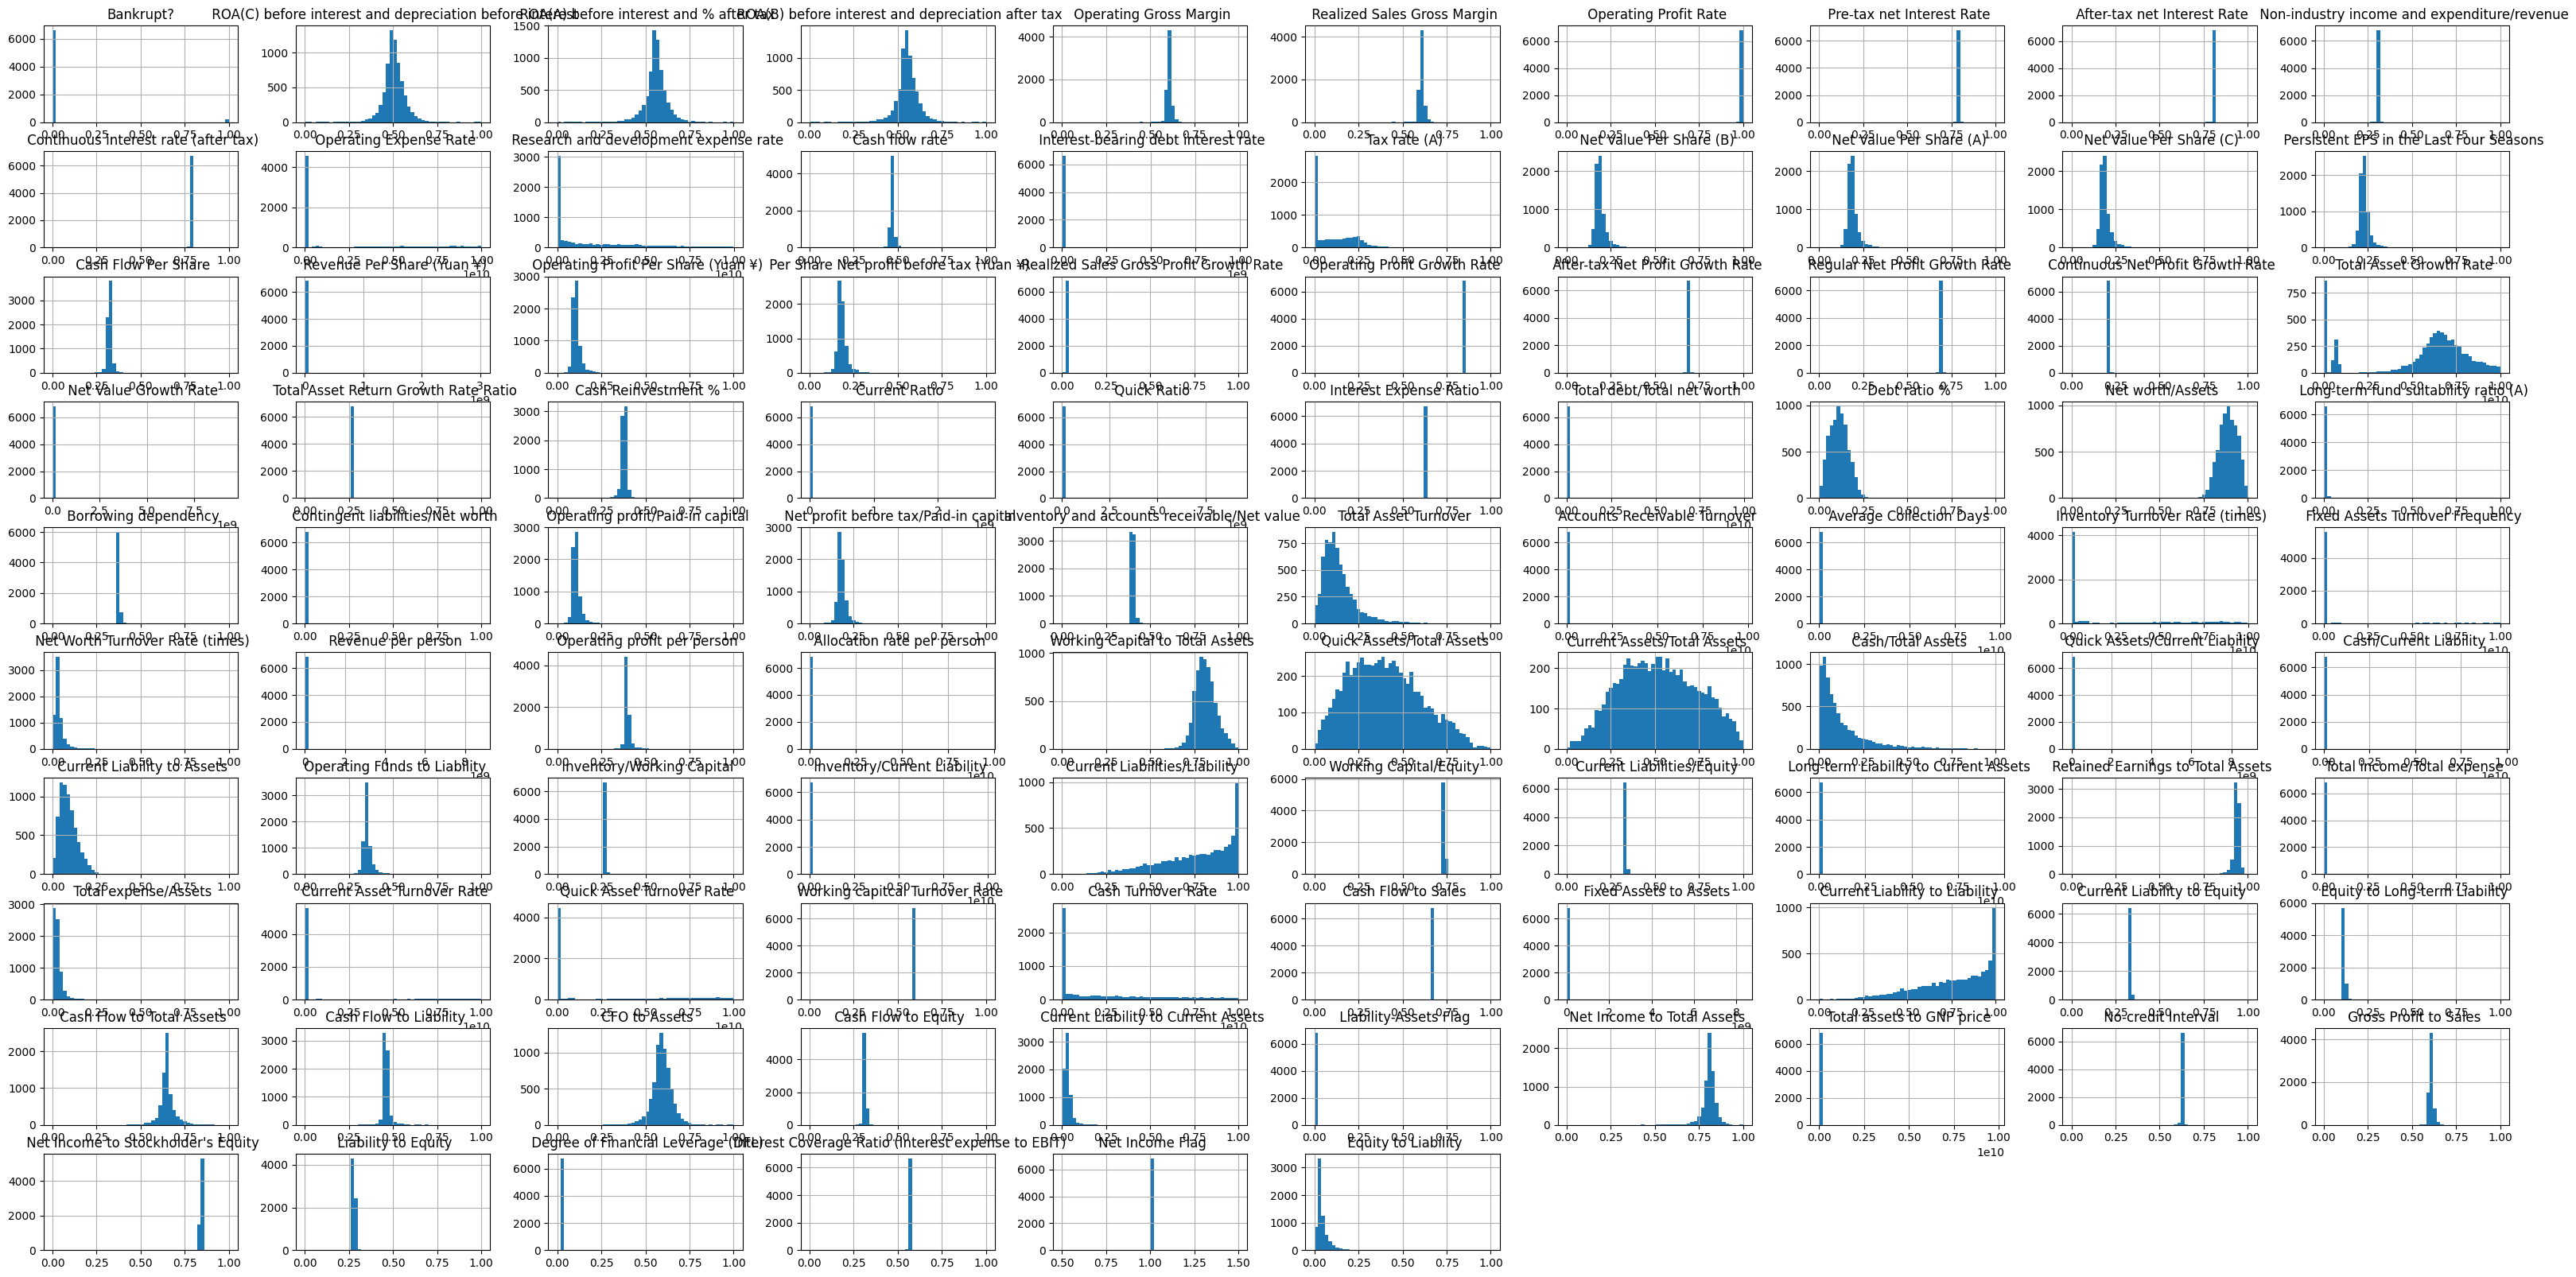

In [ ]:
# prompt: draw histogram for each feature in the data

df.hist(bins = 50, figsize = (40, 20));


#Data preprocessing

In [ ]:
df= df.copy()

##Dropping unuseful columns


In [ ]:
df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

In [ ]:
#df[' Liability-Assets Flag'].unique()
df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

this two columns consider as unnecessary. they are categorical columns which are encoded. the first one contain only one value. the second column has a very large class imbalance and we can drop both of them


In [ ]:
df.drop(columns=[' Net Income Flag', ' Liability-Assets Flag'],inplace=True)

In [ ]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

##checking for null values and duplications.

In [ ]:
print(df.isna().sum().sum())
print(np.isnan(df).sum().sum())
print(df.isnull().sum().sum())


0
0
0


In [ ]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Net Income to Stockholder's Equity                         0
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Length: 94, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

##outliers capping


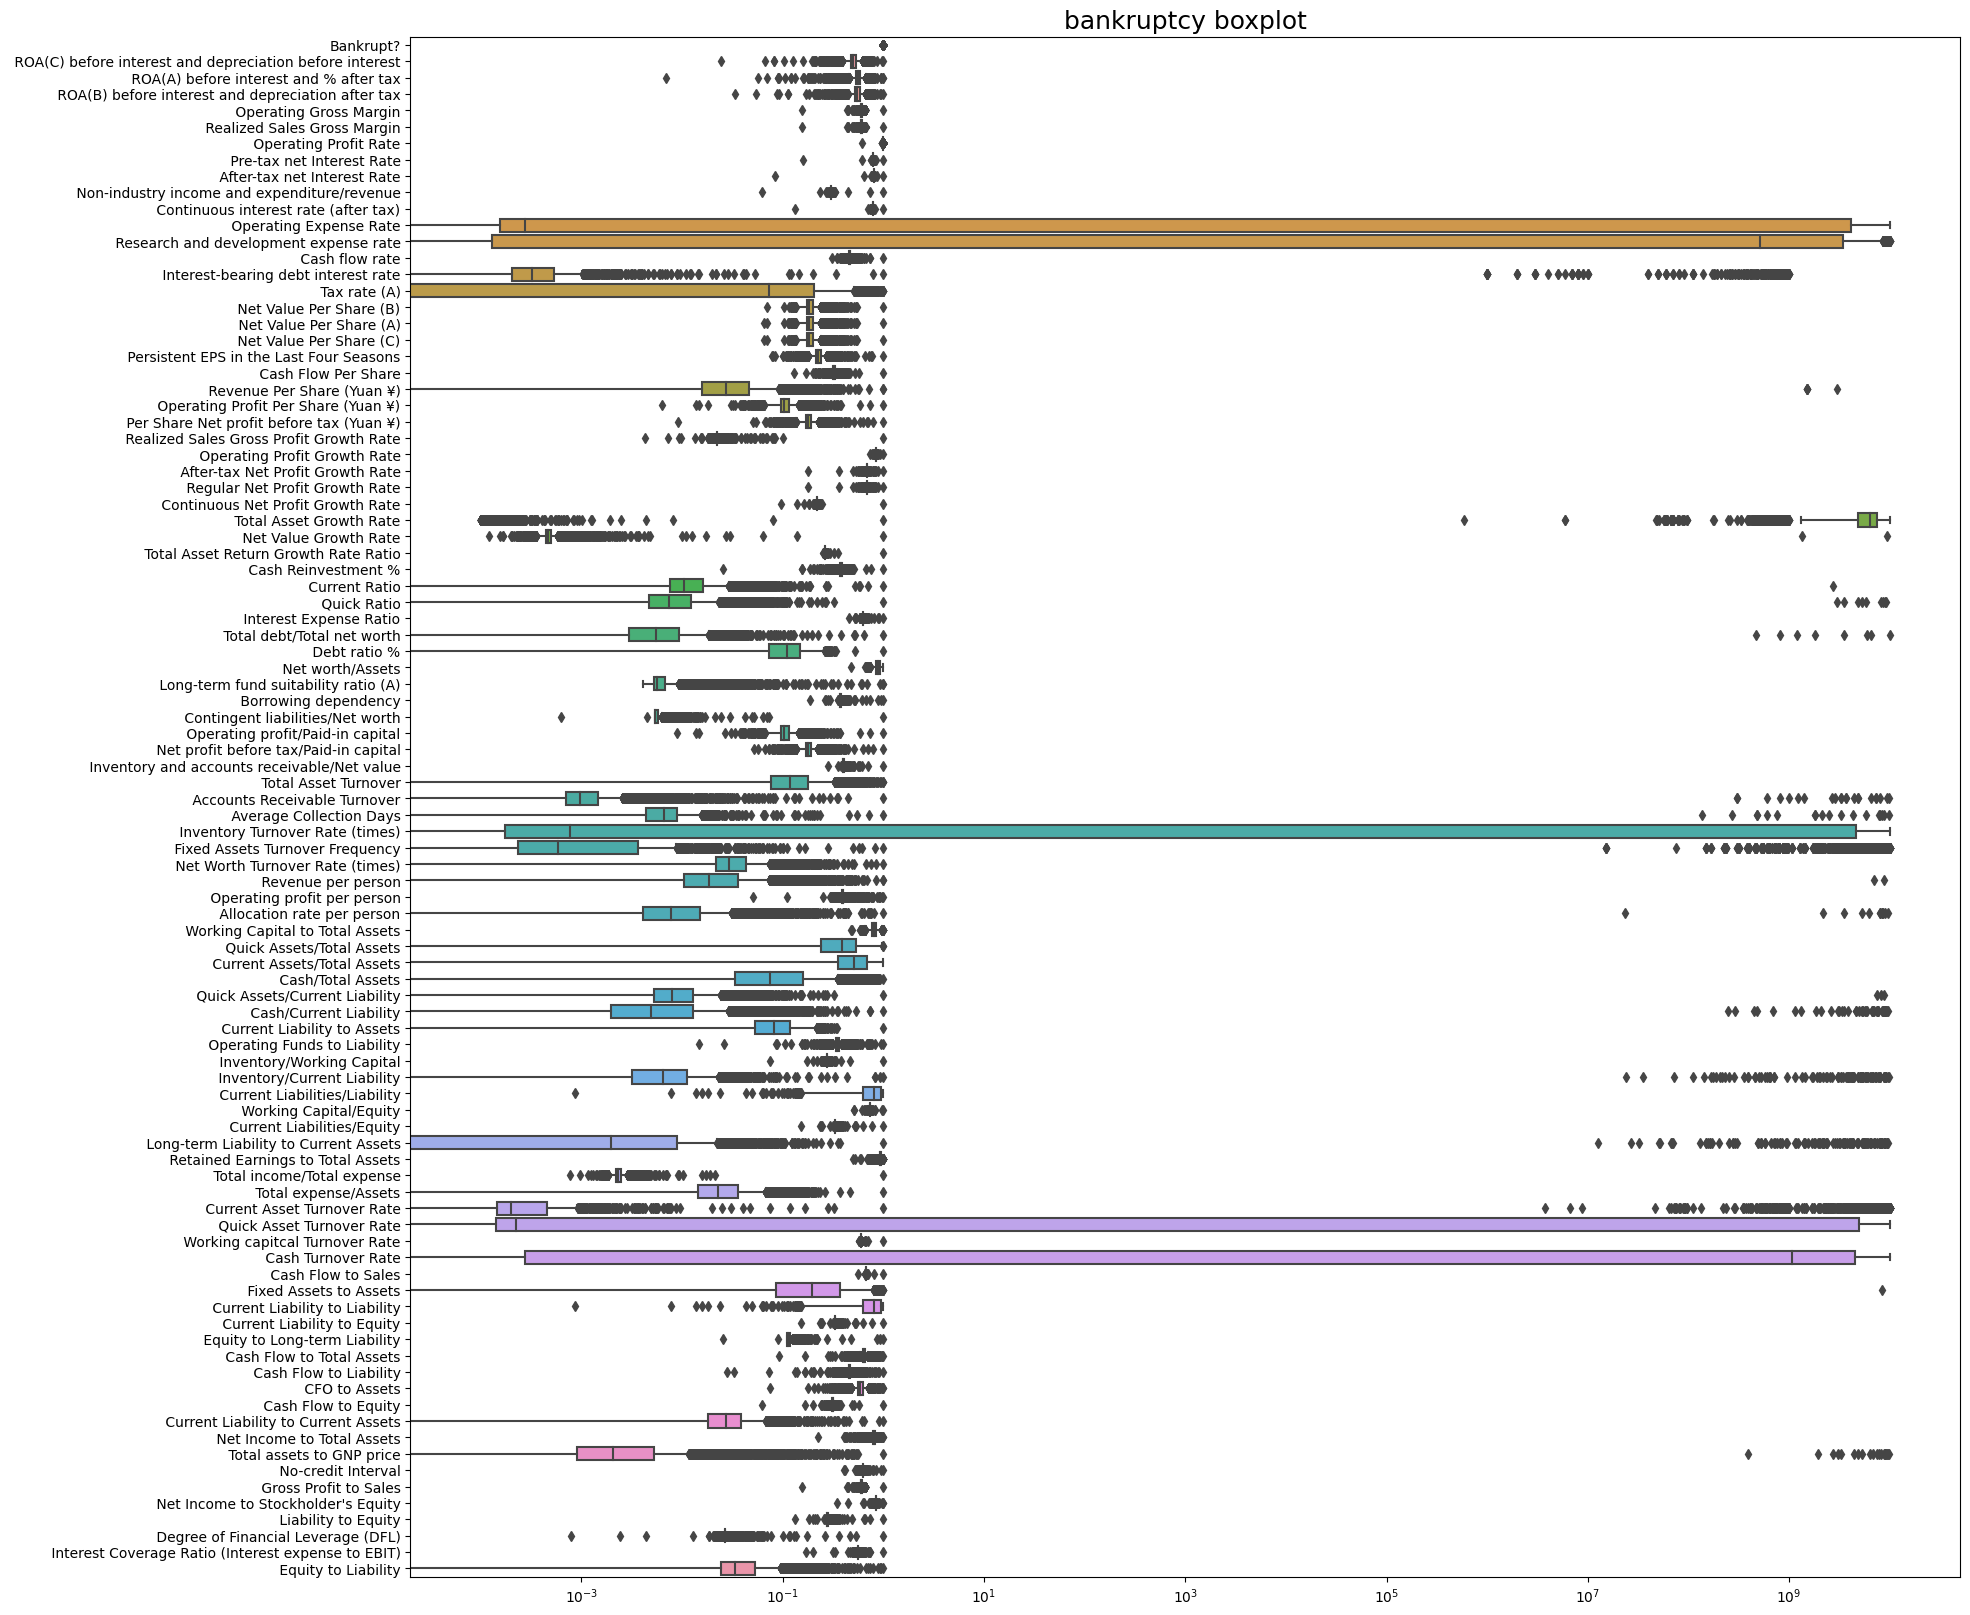

In [ ]:
plt.figure(figsize=(20,20))
ax=sns.boxplot(data=df,orient="h")
ax.set_title("bankruptcy boxplot",fontsize="18")
ax.set(xscale="log")
plt.show()

In [ ]:
def detect_outliers_iqr(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

outlier_columns = []
for column in df.iloc[:, 1:].columns:
    outliers = detect_outliers_iqr(df.iloc[:, 1:][column])
    if len(outliers) > 0:
        outlier_columns.append(column)

outlier_columns = []
for column in df.iloc[:, 1:].columns:
    outliers = detect_outliers_iqr(df.iloc[:, 1:][column])
    if len(outliers) > 0:
        outlier_columns.append(column)

print("Columns with outliers:")
for column in outlier_columns:
    print(column)

Columns with outliers:
 ROA(C) before interest and depreciation before interest
 ROA(A) before interest and % after tax
 ROA(B) before interest and depreciation after tax
 Operating Gross Margin
 Realized Sales Gross Margin
 Operating Profit Rate
 Pre-tax net Interest Rate
 After-tax net Interest Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (B)
 Net Value Per Share (A)
 Net Value Per Share (C)
 Persistent EPS in the Last Four Seasons
 Cash Flow Per Share
 Revenue Per Share (Yuan ¥)
 Operating Profit Per Share (Yuan ¥)
 Per Share Net profit before tax (Yuan ¥)
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 After-tax Net Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate Ratio
 Cash 

In [ ]:
# Define the function to detect outliers using the IQR method
def detect_outliers_iqr(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Initialize a counter for columns with outliers
outlier_columns_count = 0

# Iterate over each column in the DataFrame and check for outliers
for column in df.iloc[:, 1:].columns:
    outliers = detect_outliers_iqr(df.iloc[:, 1:][column])
    if len(outliers) > 0:
        outlier_columns_count += 1

# Print the count of columns with outliers
print("Number of columns with outliers:", outlier_columns_count)

# Initialize a counter for columns without outliers
columns_without_outliers_count = 0

# Iterate over each column in the DataFrame and check for outliers
for column in df.iloc[:, 1:].columns:
    outliers = detect_outliers_iqr(df.iloc[:, 1:][column])
    if len(outliers) == 0:
        columns_without_outliers_count += 1

# Print the count of columns without outliers
print("Number of columns without outliers:", columns_without_outliers_count)

Number of columns with outliers: 88
Number of columns without outliers: 5


In [ ]:
# Define the function to cap outliers using the IQR method
def cap_outliers_iqr(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    capped_column = np.where(column < lower_bound, lower_bound, column)
    capped_column = np.where(column > upper_bound, upper_bound, capped_column)
    return capped_column

# Iterate over each column in the DataFrame and cap outliers
for column in df.columns[1:]:
    df[column] = cap_outliers_iqr(df[column])

# Print the modified DataFrame with capped outliers
df_cleaned = df
df_cleaned


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.387973          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.455122   
1                                    0.538214   
2                                    0.499019   
3                                    0.455122   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.442034    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.797096   
1                   0.998946                    0.797380   
2                   0.998857                    0.797096   
3                   0.998781                    0.797096   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998781                    0.797868   

       After-tax net Interest Rate  \
0                         0.809075   
1                         0.809301   
2                         0.809075   
3                         0.809075   
4                         0.809304   
...                            ...   
6814                      0

In [ ]:
def detect_outliers_iqr(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Initialize a counter for columns with outliers
outlier_columns_count = 0

# Iterate over each column in the DataFrame and check for outliers
for column in df_cleaned.columns:
    outliers = detect_outliers_iqr(df_cleaned[column])
    if len(outliers) > 0:
        outlier_columns_count += 1

# Print the count of columns with outliers
print("Number of columns with outliers:", outlier_columns_count)


Number of columns with outliers: 1


In [ ]:
df_cleaned

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.387973          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.455122   
1                                    0.538214   
2                                    0.499019   
3                                    0.455122   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.442034    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.797096   
1                   0.998946                    0.797380   
2                   0.998857                    0.797096   
3                   0.998781                    0.797096   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998781                    0.797868   

       After-tax net Interest Rate  \
0                         0.809075   
1                         0.809301   
2                         0.809075   
3                         0.809075   
4                         0.809304   
...                            ...   
6814                      0

##Checking for Multicoluniarity


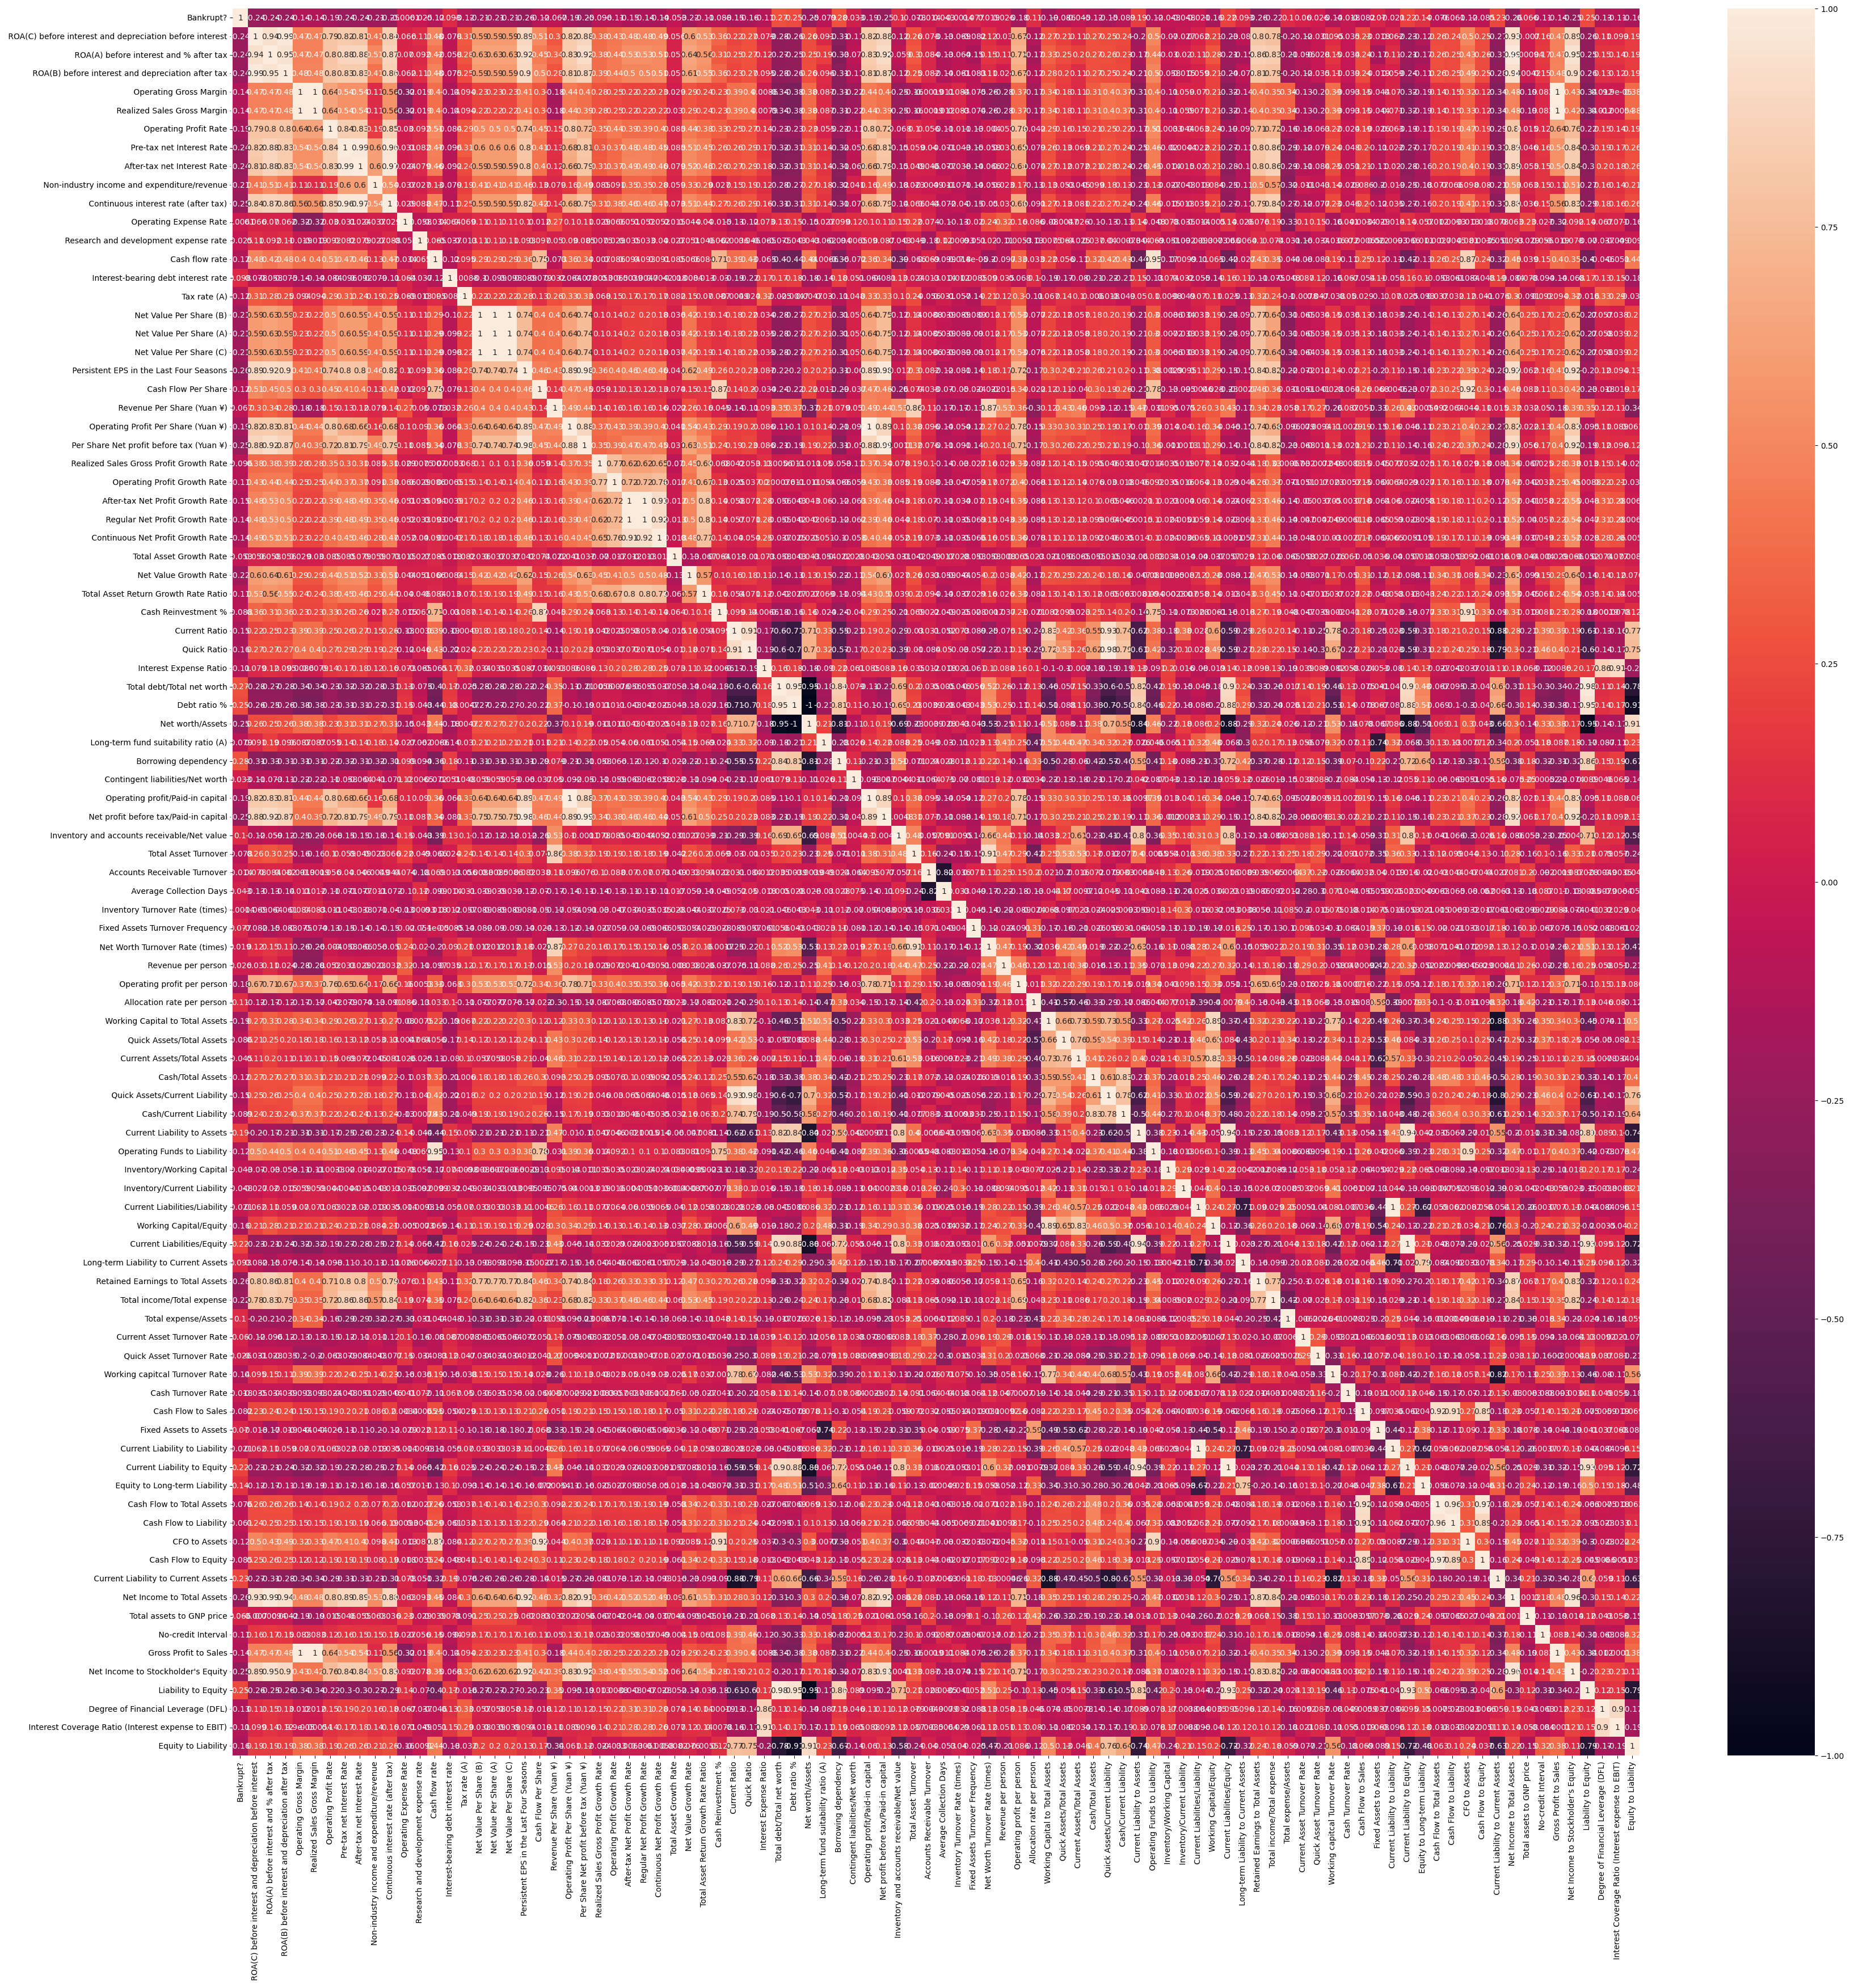

In [ ]:

df_cleaned.corr()
plt.figure(figsize=(40,40))
sns.heatmap(df_cleaned.corr(),annot=True)
plt.show()


In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df_cleaned.iloc[:,1:]
vif_result = calc_vif(X)
vif_result

variables           VIF
0    ROA(C) before interest and depreciation befor...  1.114779e+02
1              ROA(A) before interest and % after tax  1.361600e+02
2    ROA(B) before interest and depreciation after...  1.645285e+02
3                              Operating Gross Margin  1.493994e+07
4                         Realized Sales Gross Margin  7.048890e+02
..                                                ...           ...
88                 Net Income to Stockholder's Equity  3.297765e+01
89                                Liability to Equity  9.358246e+01
90                 Degree of Financial Leverage (DFL)  6.283449e+00
91   Interest Coverage Ratio (Interest expense to ...  9.305971e+00
92                                Equity to Liability  2.206786e+01

[93 rows x 2 columns]

In [ ]:

# Sort features based on VIF values in descending order
sorted_vif_result = vif_result.sort_values(by='VIF', ascending=False)

# Display the sorted result
print("Sorted VIF values:")
print(sorted_vif_result)

Sorted VIF values:
                                 variables           VIF
63           Current Liabilities/Liability  1.730250e+10
76          Current Liability to Liability  8.121926e+09
36                            Debt ratio %  2.363178e+07
37                        Net worth/Assets  2.216773e+07
65              Current Liabilities/Equity  2.033086e+07
..                                     ...           ...
47         Inventory Turnover Rate (times)  1.289733e+00
73                      Cash Turnover Rate  1.211162e+00
13     Interest-bearing debt interest rate  1.189972e+00
11   Research and development expense rate  1.169626e+00
28                 Total Asset Growth Rate  1.162967e+00

[93 rows x 2 columns]


In [ ]:
# Count features with VIF higher than 10
high_vif_features = vif_result[vif_result['VIF'] > 10]
count_high_vif_features = len(high_vif_features)

print("Number of features with VIF > 10:", count_high_vif_features)
print("\nFeatures with VIF > 10:")
print(high_vif_features)

Number of features with VIF > 10: 53

Features with VIF > 10:
                                            variables           VIF
0    ROA(C) before interest and depreciation befor...  1.114779e+02
1              ROA(A) before interest and % after tax  1.361600e+02
2    ROA(B) before interest and depreciation after...  1.645285e+02
3                              Operating Gross Margin  1.493994e+07
4                         Realized Sales Gross Margin  7.048890e+02
5                               Operating Profit Rate  1.612337e+01
6                           Pre-tax net Interest Rate  9.460162e+01
7                         After-tax net Interest Rate  1.038006e+02
9                Continuous interest rate (after tax)  4.228036e+01
12                                     Cash flow rate  1.990130e+01
15                            Net Value Per Share (B)  1.689846e+03
16                            Net Value Per Share (A)  3.322708e+03
17                            Net Value Per Share (C) 

##spilitting data

In [ ]:
from pickle import DEFAULT_PROTOCOL
X = df_cleaned.drop('Bankrupt?', axis = 1)
y = df_cleaned['Bankrupt?'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(5455, 93)
(1364, 93)


## Standard Scaler

In [ ]:
s_scaler = StandardScaler()
s_scaler.fit(X_train)
X_train_scaled = s_scaler.transform(X_train)
X_test_scaled = s_scaler.transform(X_test)

In [ ]:
len(X_train_scaled)

5455

In [ ]:
len(y_train)

5455

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

ROA(C) before interest and depreciation before interest  \
0                                             -0.218792          
1                                              0.574079          
2                                              0.417979          
3                                             -0.688993          
4                                             -2.214769          
...                                                 ...          
5450                                           0.880566          
5451                                          -0.456748          
5452                                           2.290220          
5453                                           1.598243          
5454                                          -0.078873          

       ROA(A) before interest and % after tax  \
0                                   -0.194214   
1                                    0.619855   
2                                    0.542272   
3                                   -0.460836   
4                                   -2.099082   
...                                       ...   
5450                                 0.081149   
5451                                -0.635670   
5452                                 2.199641   
5453                                 1.650281   
5454                                 0.135784   

       ROA(B) before interest and depreciation after tax  \
0                                             -0.189539    
1                                              0.385417    
2                                              0.247556    
3                                             -0.659763    
4                                             -2.237420    
...                                                 ...    
5450                                           0.786177    
5451                                          -0.481292    
5452                                           2.300246    
5453                                           1.382507    
5454                                          -0.077326    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                   -0.862987                     -0.863196   
1                   -0.790499                     -0.802602   
2                   -0.097841                     -0.095676   
3                   -1.156293                     -1.157412   
4                    2.451974                      2.446732   
...                       ...                           ...   
5450                -0.518671                     -0.517812   
5451                -0.173013                     -0.169062   
5452                 0.605556                     -0.412110   
5453                 0.184726                      0.186421   
5454                 0.108211                      0.100243   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                  -0.389208                   -0.120142   
1                  -0.030831                   -0.061907   
2                   0.637756                    0.748233   
3                  -0.501924                   -0.405423   
4                  -2.046946                   -1.967836   
...                      ...                         ...   
5450                0.157029                    0.089211   
5451               -0.044318                   -0.623623   
5452               -1.210009                    2.145521   
5453                0.307316                    0.393659   
5454               -0.000966                   -0.030209   

       After-tax net Interest Rate  \
0                        -0.138567   
1                        -0.111992   
2                         0.596398   
3                        -0.406809   
4                        -1.922414   
...                            ...   
5450                      0.152097   
5451                     -0.729031   
5452                      2.100377   
5453                      0.318191   
5454    

In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled

ROA(C) before interest and depreciation before interest  \
0                                             -0.034137          
1                                             -0.371084          
2                                              0.964327          
3                                              2.325913          
4                                             -1.061157          
...                                                 ...          
1359                                          -0.390120          
1360                                          -0.442470          
1361                                           0.338978          
1362                                          -0.481495          
1363                                          -1.063060          

       ROA(A) before interest and % after tax  \
0                                   -0.074016   
1                                   -0.242294   
2                                    1.176045   
3                                    2.199641   
4                                   -0.999542   
...                                       ...   
1359                                 0.240684   
1360                                -0.411664   
1361                                 0.420982   
1362                                -0.249943   
1363                                -0.761331   

       ROA(B) before interest and depreciation after tax  \
0                                             -0.036716    
1                                             -0.468468    
2                                              1.106784    
3                                              2.300246    
4                                             -1.171667    
...                                                 ...    
1359                                          -0.418239    
1360                                          -0.403277    
1361                                           0.195190    
1362                                          -0.463124    
1363                                          -0.893807    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.149824                      0.152758   
1                   -0.836140                     -0.836265   
2                    0.006192                      0.011372   
3                    2.077455                      2.086368   
4                    2.451974                      2.446732   
...                       ...                           ...   
1359                -1.097229                     -1.097491   
1360                -0.585118                     -0.576386   
1361                -0.809292                     -0.809335   
1362                -1.035480                     -1.042957   
1363                -1.156964                     -1.158085   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.135834                   -0.112771   
1                  -0.208093                   -0.224082   
2                   0.137761                    1.555424   
3                   2.132200                    1.823751   
4                  -2.046946                   -1.354149   
...                      ...                         ...   
1359               -0.277456                   -0.109822   
1360               -0.468206                   -0.489460   
1361               -0.018307                    0.086263   
1362               -0.304431                   -0.235139   
1363               -1.028893                   -1.135950   

       After-tax net Interest Rate  \
0                        -0.174277   
1                        -0.287221   
2                         1.669364   
3                         1.750750   
4                        -1.882552   
...                            ...   
1359                     -0.101196   
1360                     -0.414283   
1361                      0.012578   
1362                     -0.238223   
1363    

##checking for data balance

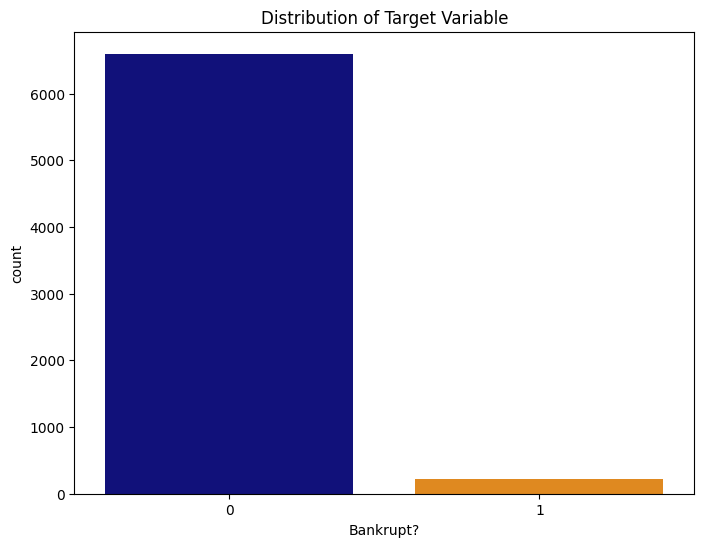

In [ ]:
# Create a count plot to visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Bankrupt?', data=df_cleaned, palette=['darkblue', 'darkorange'])
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
df_cleaned['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [ ]:
class_counts = df_cleaned['Bankrupt?'].value_counts(normalize=True)

# Display the percentage of each class with '%' symbol
for label, percentage in class_counts.items():
    print(f"Class {label}: {percentage * 100:.2f}%")


Class 0: 96.77%
Class 1: 3.23%


Bankruptcy column is very imbalance. only 3.2% for class one. So let's check Anomaly case with this dataset using PCA

## Anomaly Detection

In [ ]:
# *Converting Dataset using StandardScalar:-*
X = df
Y = df['Bankrupt?'].map({0:1,1:-1})

from sklearn.preprocessing import StandardScaler
st = StandardScaler()

X_1 = st.fit_transform(X)
X_1

# *Train and Test Split of the Dataset:-*

from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X_1,Y,test_size=0.25, random_state=0, stratify=Y)

train_X.shape, test_X.shape

train_Y.shape, test_Y.shape

test_Y.value_counts()

train_Y.value_counts()

# *Building Isolation Forest Model in UnSupervised Setting:-*

from sklearn.ensemble import IsolationForest

clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=0, verbose=0, contamination=0.033)
clf.fit(train_X)

pred_train = clf.predict(train_X)

np.unique(pred_train, return_counts=True)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

target_names = ['bankrupt_company', 'normal_company']
print(classification_report(train_Y, pred_train, target_names=target_names))
print ("AUC: ", "{:.1%}".format(roc_auc_score(train_Y, pred_train)))
cm = confusion_matrix(train_Y, pred_train )

print(cm)

pred_test = clf.predict(test_X)

target_names2 = ['bankrupt_company', 'normal_company']
print(classification_report(test_Y, pred_test, target_names=target_names2))
print ("AUC: ", "{:.1%}".format(roc_auc_score(test_Y, pred_test)))
cm2 = confusion_matrix(test_Y, pred_test)

print(cm2)

                  precision    recall  f1-score   support

bankrupt_company       0.30      0.31      0.31       165
  normal_company       0.98      0.98      0.98      4949

        accuracy                           0.95      5114
       macro avg       0.64      0.64      0.64      5114
    weighted avg       0.96      0.95      0.95      5114

AUC:  64.3%
[[  51  114]
 [ 118 4831]]
                  precision    recall  f1-score   support

bankrupt_company       0.35      0.44      0.39        55
  normal_company       0.98      0.97      0.98      1650

        accuracy                           0.96      1705
       macro avg       0.66      0.70      0.68      1705
    weighted avg       0.96      0.96      0.96      1705

AUC:  70.5%
[[  24   31]
 [  45 1605]]


Since the precision and recall value is low that mean that our model struggles with class 1. let's  visualize the dataset using PCA to
investigate the problem


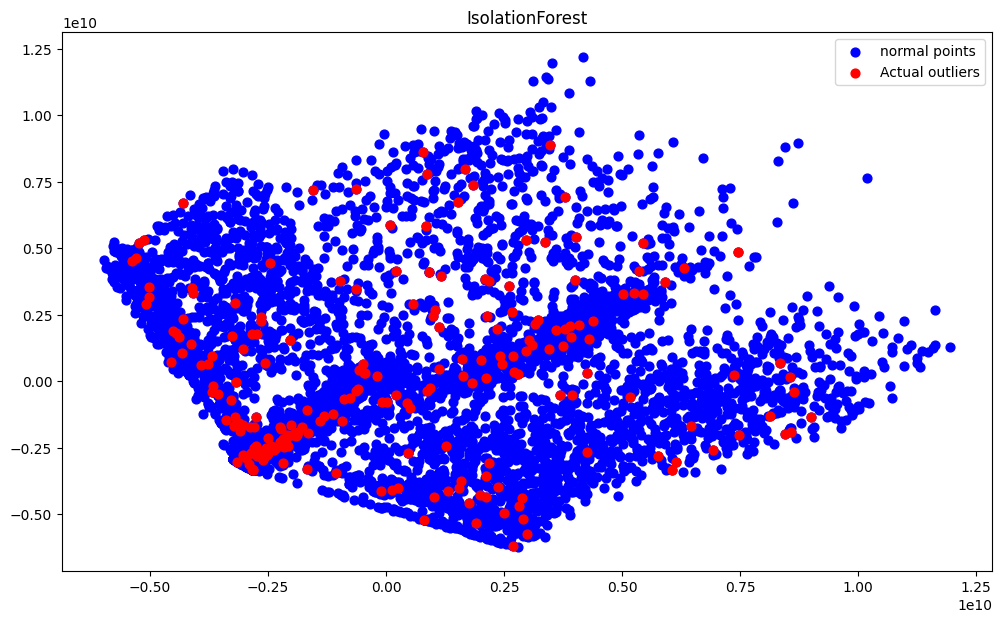

In [ ]:

df2 = df.iloc[:,1:].copy()

X = df2
Y = df['Bankrupt?']

bankrupt_index = df[df['Bankrupt?']==1].index
bankrupt_index

from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X)

res=pd.DataFrame(pca.transform(X))

Z = np.array(res)
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='blue',
                 s=40,label="normal points")

b1 = plt.scatter(res.iloc[bankrupt_index,0],res.iloc[bankrupt_index,1], c='red',
                 s=40,  edgecolor="red",label="Actual outliers")
plt.legend(loc="upper right")
plt.show()


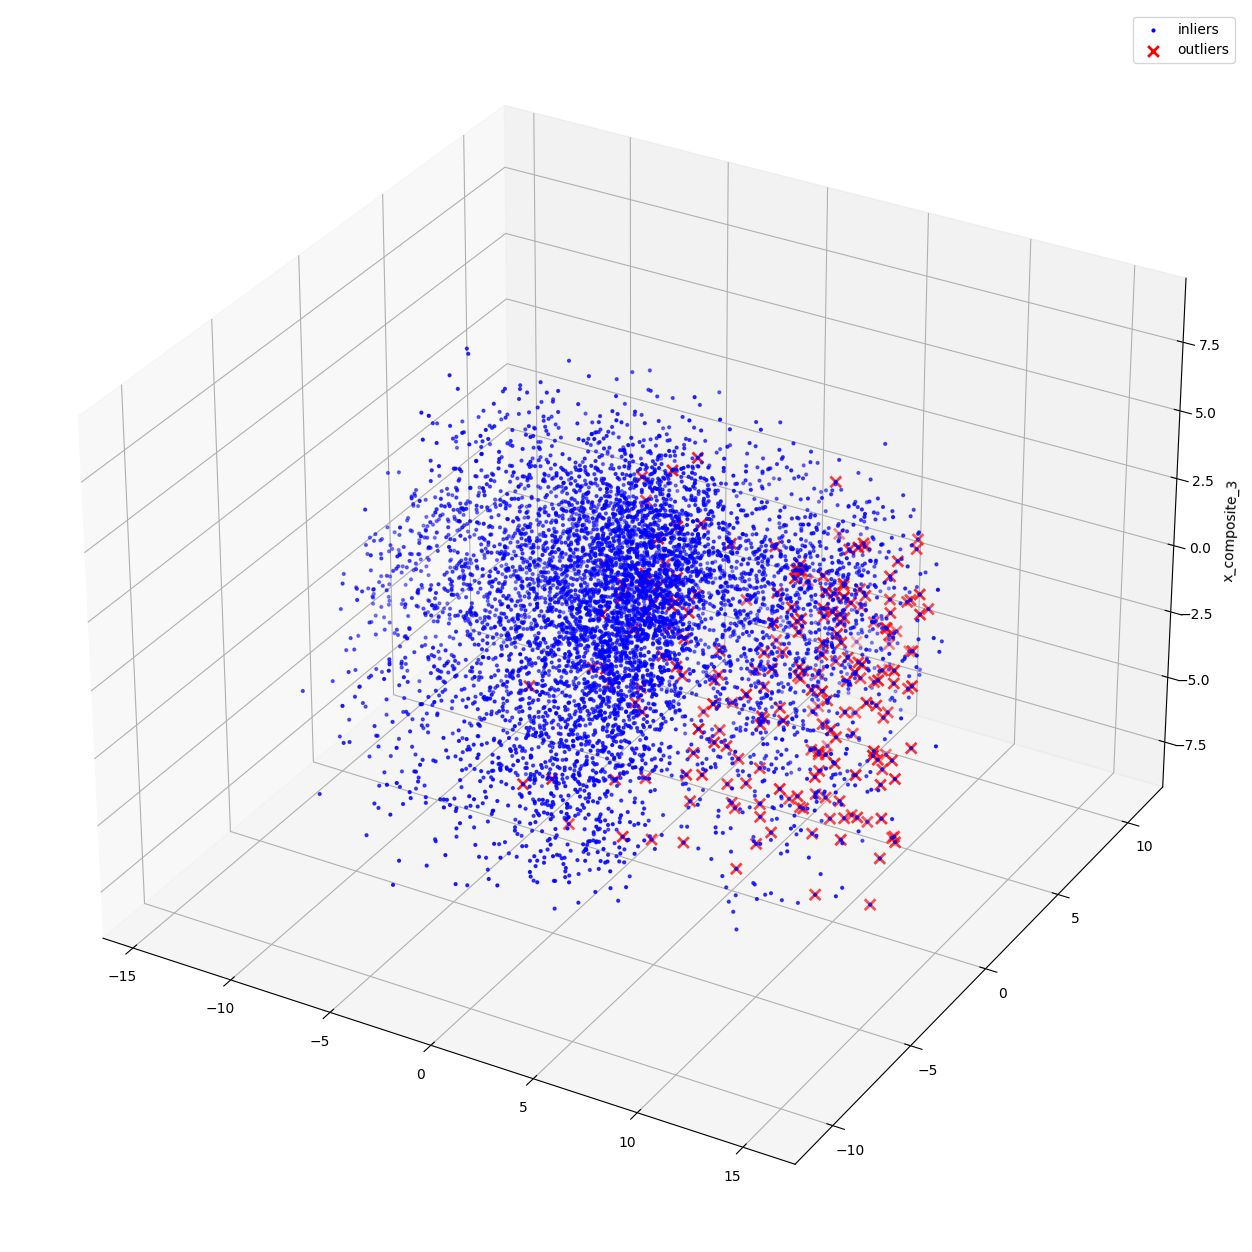

In [ ]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(X)
X_reduce = pca.fit_transform(X)

fig = plt.figure( figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="blue")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[bankrupt_index,0],X_reduce[bankrupt_index,1], X_reduce[bankrupt_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

Classes are intertwined &
overlapping. Thus, bankruptcy isn’t
an anomaly. Bankrupt instances,
simply, happen to be sparse in the
date set. So we will smote the data

#checking for linearity

In [ ]:


df.corr()['Bankrupt?']


Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest   -0.239543
 ROA(A) before interest and % after tax                    -0.239500
 ROA(B) before interest and depreciation after tax         -0.241993
 Operating Gross Margin                                    -0.140042
                                                              ...   
 Net Income to Stockholder's Equity                        -0.251917
 Liability to Equity                                        0.246176
 Degree of Financial Leverage (DFL)                        -0.129292
 Interest Coverage Ratio (Interest expense to EBIT)        -0.110761
 Equity to Liability                                       -0.161036
Name: Bankrupt?, Length: 94, dtype: float64

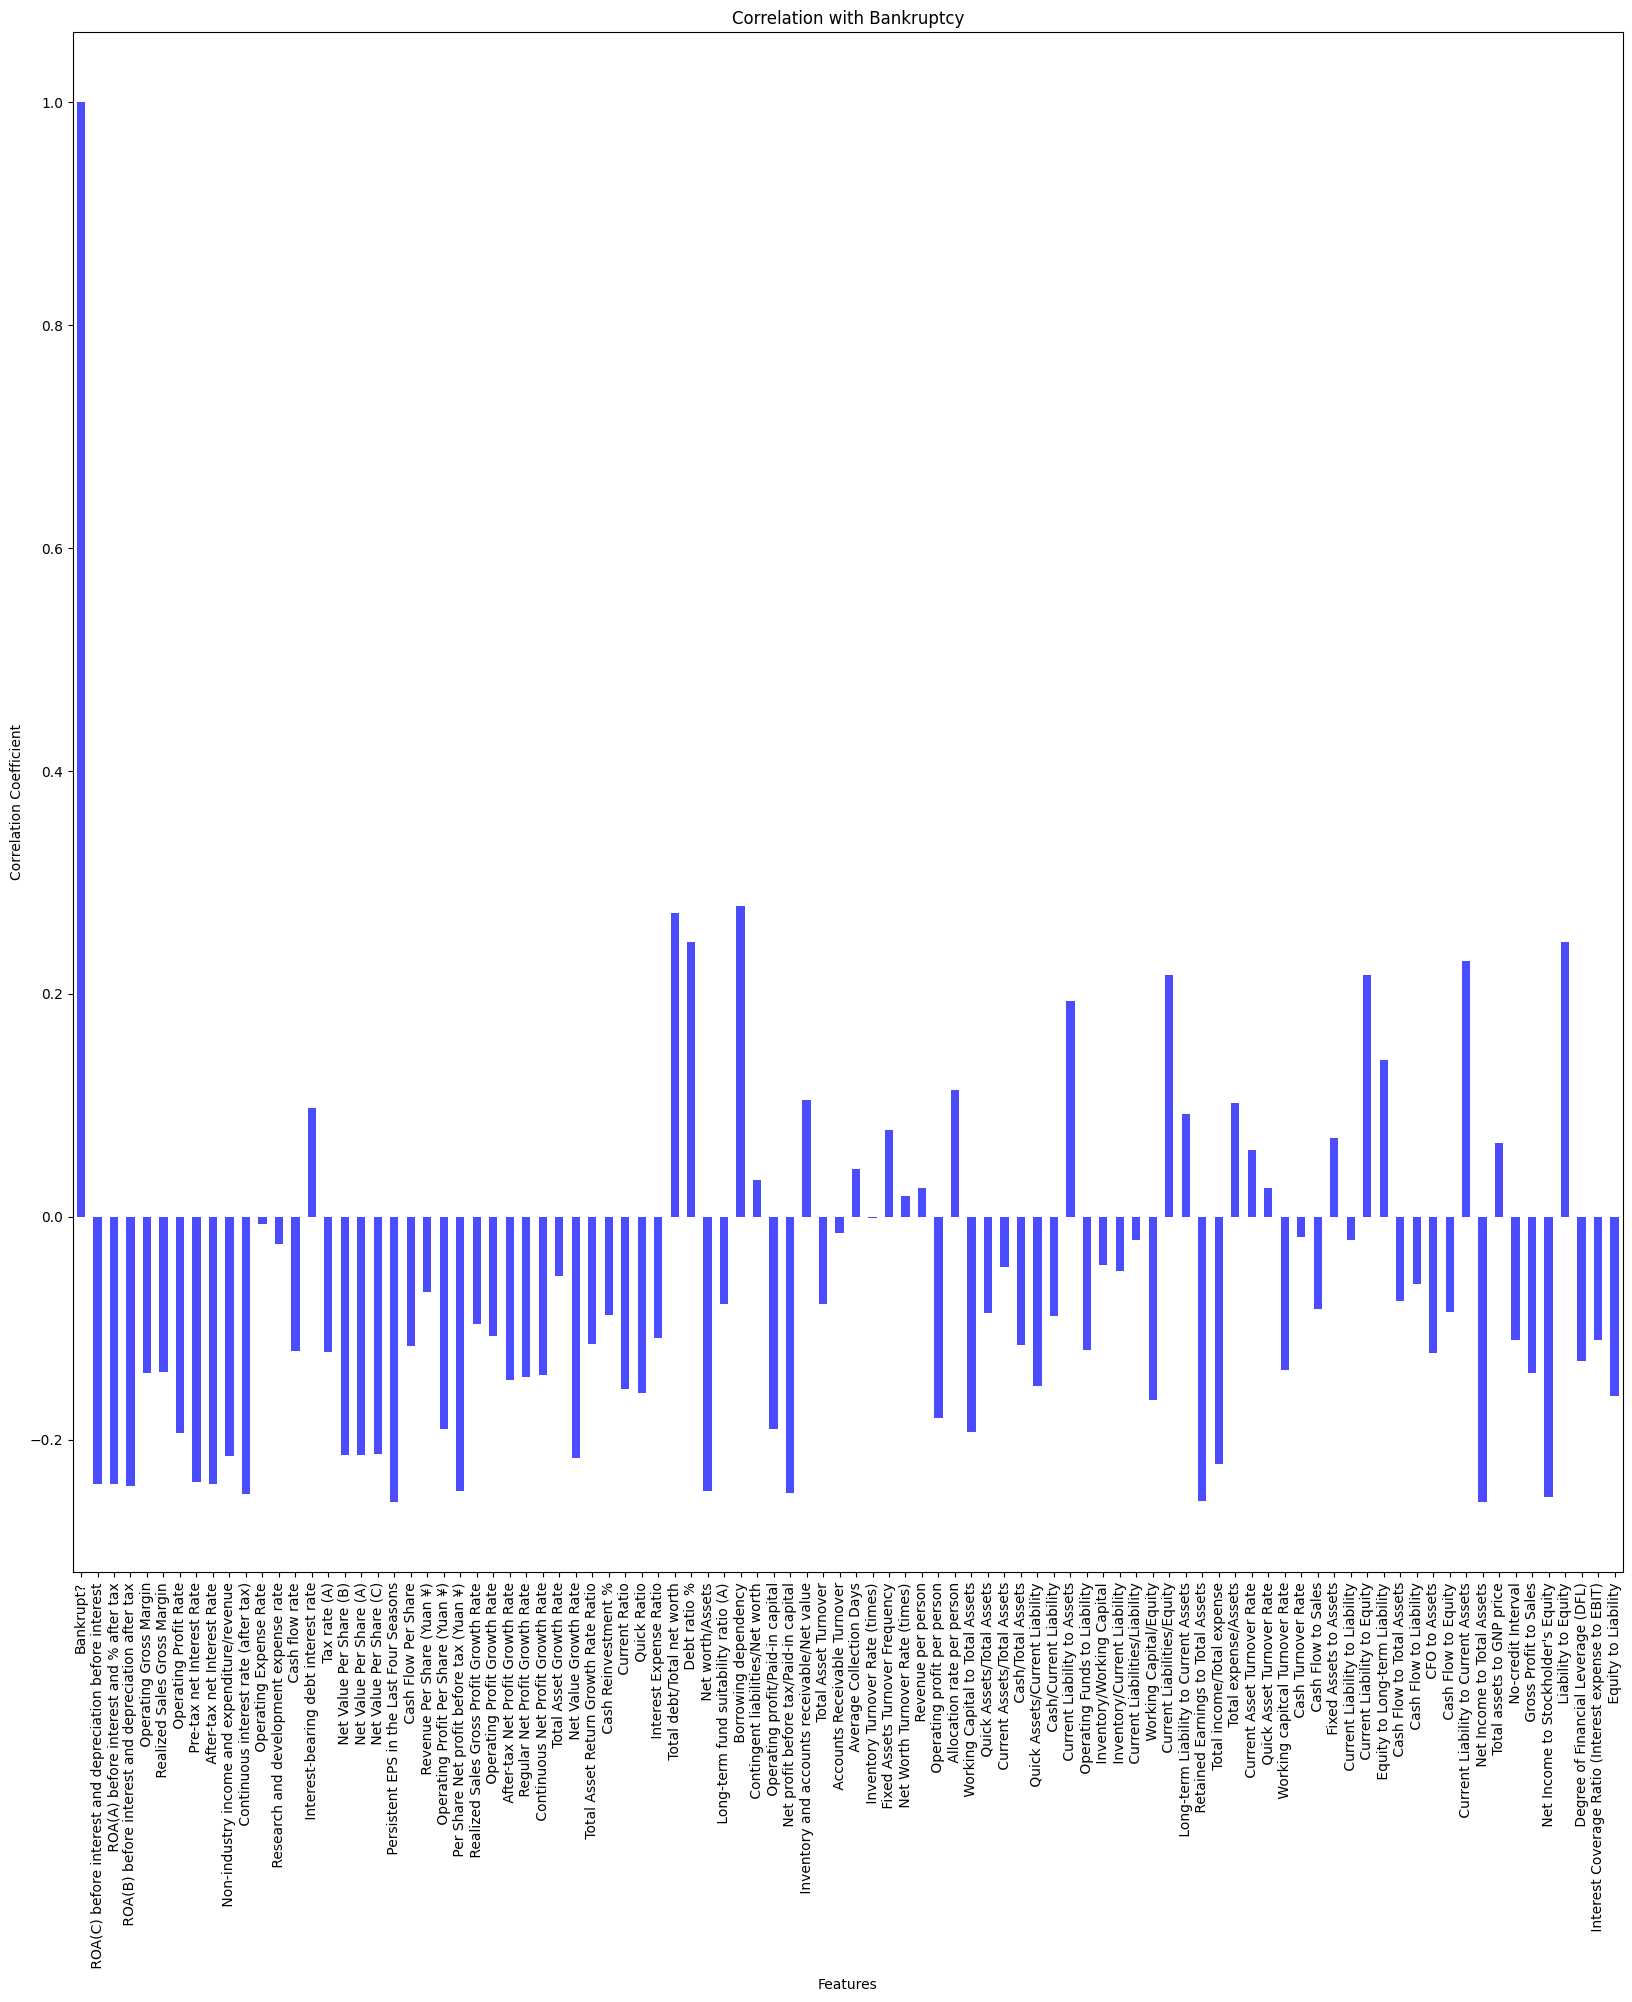

In [ ]:
correlations=df.corr()['Bankrupt?']
import matplotlib.pyplot as plt

# Plotting the correlations
correlations.plot(kind='bar', figsize=(20, 20), color='blue', alpha=0.7)
plt.title('Correlation with Bankruptcy')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


#models without balacing techniques

##PCA for dimentionality reduction

In [ ]:
pca=PCA()
pca.fit(X_train_scaled)
exp_variance = pca.explained_variance_ratio_
cum_exp_variance = np.cumsum(exp_variance)
print(cum_exp_variance)

[0.25611217 0.39117652 0.48017277 0.52845127 0.57518833 0.61341973
 0.64527925 0.67584747 0.70396104 0.728935   0.74830102 0.76706242
 0.78262061 0.79682056 0.80962961 0.82059638 0.83124919 0.841297
 0.85108414 0.86071555 0.86951514 0.87794252 0.8862575  0.89372901
 0.90109899 0.90819919 0.91466356 0.92097425 0.9267167  0.9322052
 0.93717566 0.94191977 0.94633757 0.95064578 0.95480151 0.95828371
 0.961037   0.96358662 0.9659644  0.96810755 0.97015185 0.97208275
 0.97392075 0.97560808 0.97728318 0.97887444 0.98030773 0.98171679
 0.98307848 0.98438333 0.98557478 0.98670059 0.98778848 0.98883064
 0.98979599 0.99068851 0.99154461 0.99234583 0.99308448 0.99379436
 0.99443751 0.99503402 0.99559056 0.99608173 0.99653316 0.99695369
 0.99734963 0.99771466 0.99805122 0.99833875 0.99860789 0.99884162
 0.99903044 0.99920872 0.99934159 0.99946468 0.99956772 0.99966835
 0.99974217 0.99980513 0.99986547 0.99990647 0.99993624 0.9999652
 0.99997824 0.99998892 0.99999391 0.99999843 1.         1.
 1.    

In [ ]:
# Set your desired explained variance threshold (e.g., 95%)
desired_variance = 0.95

# Find the number of components that meet the threshold
num_components_threshold = np.argmax(cum_exp_variance >= desired_variance) + 1

# Print the cumulative explained variance
print("Cumulative Explained Variance:")
print(cum_exp_variance)

# Print the number of components needed to reach the desired variance
print(f'\nNumber of components for {desired_variance * 100}% explained variance: {num_components_threshold}')

Cumulative Explained Variance:
[0.25611217 0.39117652 0.48017277 0.52845127 0.57518833 0.61341973
 0.64527925 0.67584747 0.70396104 0.728935   0.74830102 0.76706242
 0.78262061 0.79682056 0.80962961 0.82059638 0.83124919 0.841297
 0.85108414 0.86071555 0.86951514 0.87794252 0.8862575  0.89372901
 0.90109899 0.90819919 0.91466356 0.92097425 0.9267167  0.9322052
 0.93717566 0.94191977 0.94633757 0.95064578 0.95480151 0.95828371
 0.961037   0.96358662 0.9659644  0.96810755 0.97015185 0.97208275
 0.97392075 0.97560808 0.97728318 0.97887444 0.98030773 0.98171679
 0.98307848 0.98438333 0.98557478 0.98670059 0.98778848 0.98883064
 0.98979599 0.99068851 0.99154461 0.99234583 0.99308448 0.99379436
 0.99443751 0.99503402 0.99559056 0.99608173 0.99653316 0.99695369
 0.99734963 0.99771466 0.99805122 0.99833875 0.99860789 0.99884162
 0.99903044 0.99920872 0.99934159 0.99946468 0.99956772 0.99966835
 0.99974217 0.99980513 0.99986547 0.99990647 0.99993624 0.9999652
 0.99997824 0.99998892 0.99999391 0

In [ ]:
pca = PCA(n_components=34,random_state=7)

X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

In [ ]:
len(X_train_pca)

5455

In [ ]:
len(y_train)

5455

##Random forest

In [ ]:
rf_model = RandomForestClassifier(random_state = 0, n_estimators = 100)
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
rf_y_pred = rf_model.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.80      0.09      0.16        44

    accuracy                           0.97      1364
   macro avg       0.89      0.55      0.57      1364
weighted avg       0.97      0.97      0.96      1364



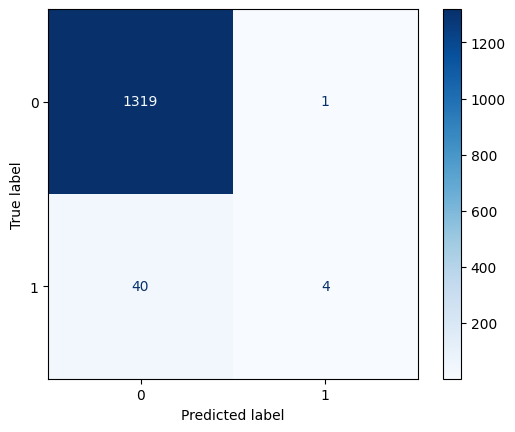

In [ ]:
print(classification_report(y_test, rf_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, cmap='Blues')
plt.grid(False)



In [ ]:
auc = round(metrics.roc_auc_score(y_test,rf_y_pred), 2)
f1 = round(metrics.f1_score(y_test, rf_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test, rf_y_pred), 2)
recall = round(metrics.recall_score(y_test,rf_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,rf_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.55
f1 0.96
precision 0.8
recall 0.09


##logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg_model = LogisticRegression(max_iter=1000,random_state=42)

# Train the model
logreg_model.fit(X_train_pca , y_train)

# Make predictions
log_y_pred = logreg_model.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1320
           1       0.62      0.30      0.40        44

    accuracy                           0.97      1364
   macro avg       0.80      0.64      0.69      1364
weighted avg       0.97      0.97      0.97      1364



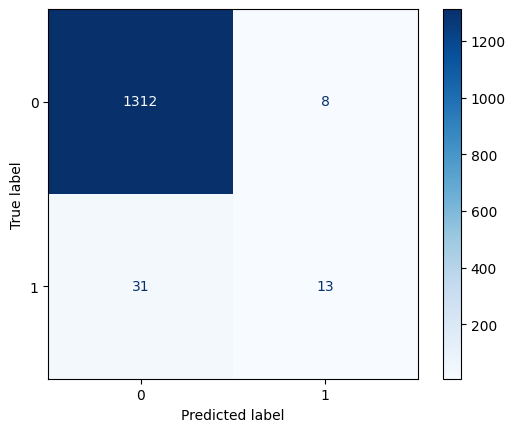

In [ ]:
print(classification_report(y_test, log_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, log_y_pred, cmap='Blues')
plt.grid(False)



In [ ]:
auc = round(metrics.roc_auc_score(y_test,log_y_pred), 2)
f1 = round(metrics.f1_score(y_test, log_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test, log_y_pred), 2)
recall = round(metrics.recall_score(y_test,log_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,log_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.64
f1 0.97
precision 0.62
recall 0.3


##Adaboost

In [ ]:
# Create a weak learner (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with the weak learner
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train_pca, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
# Make predictions on the test set
Adaboost_y_pred = adaboost_classifier.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1320
           1       0.31      0.20      0.25        44

    accuracy                           0.96      1364
   macro avg       0.64      0.59      0.61      1364
weighted avg       0.95      0.96      0.96      1364



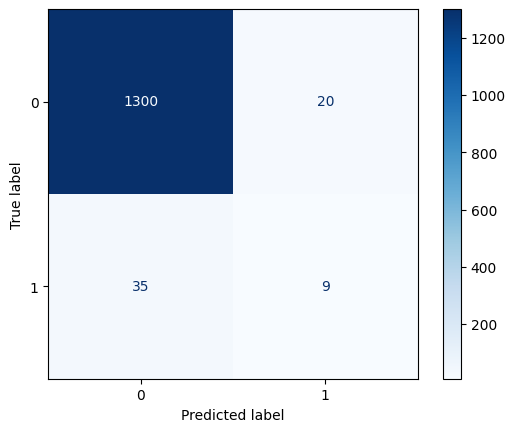

In [ ]:
print(classification_report(y_test, Adaboost_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, Adaboost_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,Adaboost_y_pred), 2)
f1 = round(metrics.f1_score(y_test, Adaboost_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,Adaboost_y_pred), 2)
recall = round(metrics.recall_score(y_test,Adaboost_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,Adaboost_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.59
f1 0.96
precision 0.31
recall 0.2


##SVM

In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
SVC_y_pred = svm_classifier.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.75      0.07      0.12        44

    accuracy                           0.97      1364
   macro avg       0.86      0.53      0.55      1364
weighted avg       0.96      0.97      0.96      1364



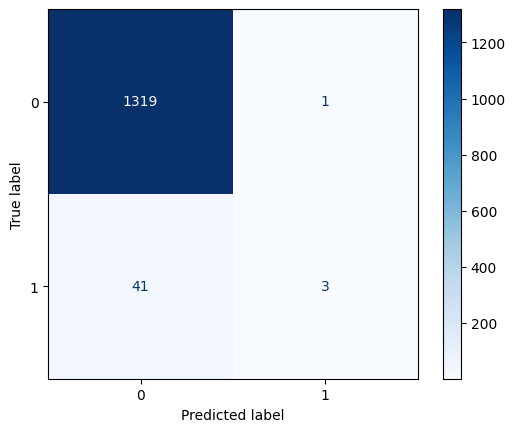

In [ ]:
print(classification_report(y_test, SVC_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, SVC_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,SVC_y_pred), 2)
f1 = round(metrics.f1_score(y_test, SVC_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,SVC_y_pred), 2)
recall = round(metrics.recall_score(y_test,SVC_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,SVC_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.53
f1 0.96
precision 0.75
recall 0.07


##KNN

In [ ]:
# Create a KNN classifier with k=3 (you can adjust the value of k)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
knn_y_pred = knn_classifier.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.55      0.27      0.36        44

    accuracy                           0.97      1364
   macro avg       0.76      0.63      0.67      1364
weighted avg       0.96      0.97      0.96      1364



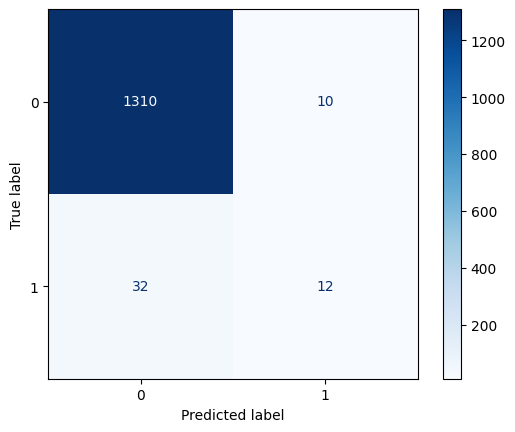

In [ ]:
print(classification_report(y_test, knn_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,knn_y_pred), 2)
f1 = round(metrics.f1_score(y_test, knn_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,knn_y_pred), 2)
recall = round(metrics.recall_score(y_test,knn_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,knn_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.63
f1 0.96
precision 0.55
recall 0.27


##Decsion Tree

In [ ]:
# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree_classifier.fit(X_train_pca, y_train)

# Make predictions on the testing set
DT_y_pred = decision_tree_classifier.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.37      0.41      0.39        44

    accuracy                           0.96      1364
   macro avg       0.67      0.69      0.68      1364
weighted avg       0.96      0.96      0.96      1364



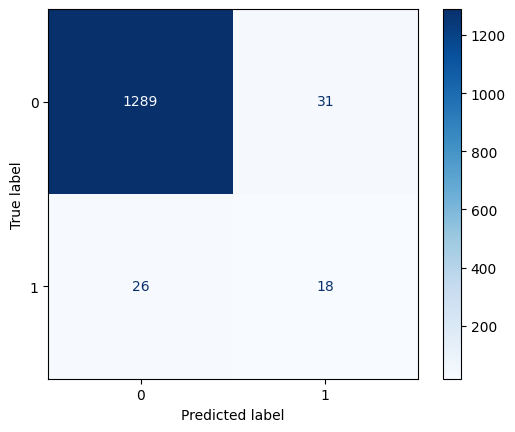

In [ ]:
print(classification_report(y_test, DT_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, DT_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,DT_y_pred), 2)
f1 = round(metrics.f1_score(y_test, DT_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,DT_y_pred), 2)
recall = round(metrics.recall_score(y_test,DT_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,DT_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.69
f1 0.96
precision 0.37
recall 0.41


##Naive Bayes

In [ ]:
# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the model on the training set
naive_bayes_classifier.fit(X_train_pca, y_train)

# Make predictions on the testing set
Naive_y_pred = naive_bayes_classifier.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.34      0.57      0.42        44

    accuracy                           0.95      1364
   macro avg       0.66      0.77      0.70      1364
weighted avg       0.96      0.95      0.96      1364



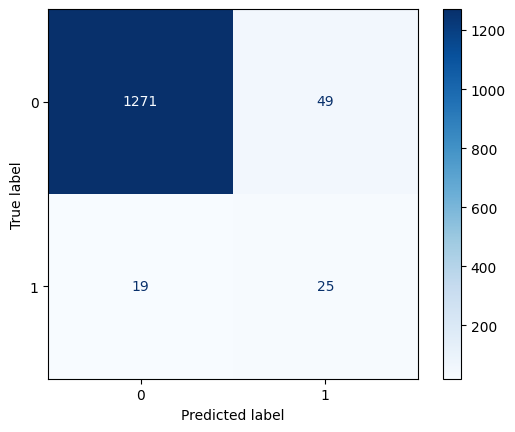

In [ ]:
print(classification_report(y_test, Naive_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, Naive_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,Naive_y_pred), 2)
f1 = round(metrics.f1_score(y_test, Naive_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,Naive_y_pred), 2)
recall = round(metrics.recall_score(y_test,Naive_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,Naive_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.77
f1 0.96
precision 0.34
recall 0.57


##xgboost after hyperparameter tuning

In [ ]:
pca = PCA(n_components=34,random_state=7)

X_train_pca_2 = pca.fit_transform(X_train_scaled)

X_test_pca_2 = pca.transform(X_test_scaled)

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(learning_rate= 0.049049280704634754, max_depth= 5,n_estimators=188,subsample=  0.6369904577754233)

# Train the model on the training set
xgb_classifier.fit(X_train_pca_2, y_train)

# Make predictions on the testing set
XG_y_pred = xgb_classifier.predict(X_test_pca_2)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1320
           1       0.73      0.25      0.37        44

    accuracy                           0.97      1364
   macro avg       0.85      0.62      0.68      1364
weighted avg       0.97      0.97      0.97      1364



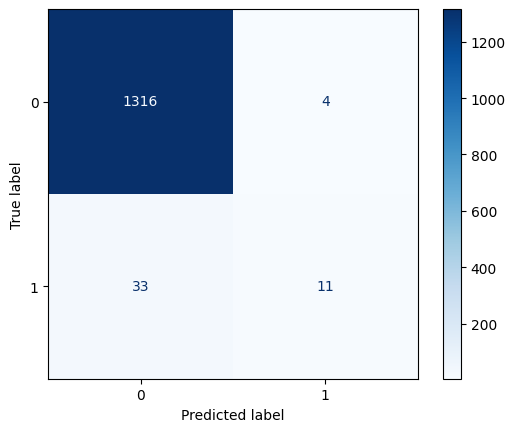

In [ ]:
print(classification_report(y_test, XG_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, XG_y_pred, cmap='Blues')
plt.grid(False)

In [ ]:
auc = round(metrics.roc_auc_score(y_test,XG_y_pred), 2)
f1 = round(metrics.f1_score(y_test,XG_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,XG_y_pred), 2)
recall = round(metrics.recall_score(y_test,XG_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,XG_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.62
f1 0.97
precision 0.73
recall 0.25


##XGBoost

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_classifier.fit(X_train_pca, y_train)

# Make predictions on the testing set
XG_y_pred = xgb_classifier.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1320
           1       0.73      0.25      0.37        44

    accuracy                           0.97      1364
   macro avg       0.85      0.62      0.68      1364
weighted avg       0.97      0.97      0.97      1364



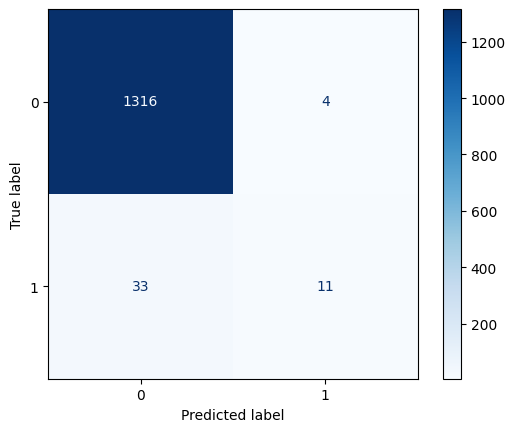

In [ ]:
print(classification_report(y_test, XG_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, XG_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,XG_y_pred), 2)
f1 = round(metrics.f1_score(y_test,XG_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,XG_y_pred), 2)
recall = round(metrics.recall_score(y_test,XG_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,XG_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.62
f1 0.97
precision 0.73
recall 0.25


##QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Initialize Quadratic Discriminant Analysis
qda_model = QuadraticDiscriminantAnalysis()

# Train the model
qda_model.fit(X_train_pca, y_train)

# Make predictions on the test set
qda_y_pred = qda_model.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.23      0.61      0.34        44

    accuracy                           0.92      1364
   macro avg       0.61      0.77      0.65      1364
weighted avg       0.96      0.92      0.94      1364



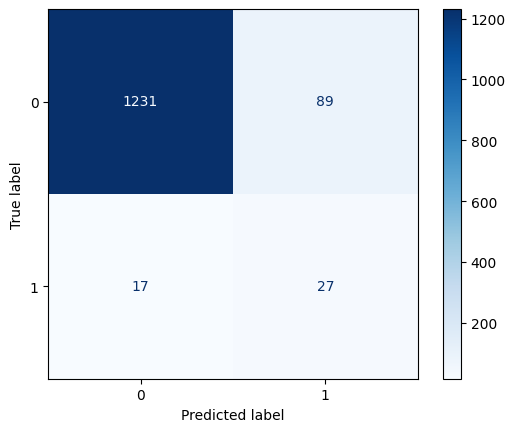

In [ ]:
print(classification_report(y_test, qda_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, qda_y_pred, cmap='Blues')
plt.grid(False)

In [ ]:
auc = round(metrics.roc_auc_score(y_test,qda_y_pred), 2)
f1 = round(metrics.f1_score(y_test,qda_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,qda_y_pred), 2)
recall = round(metrics.recall_score(y_test,qda_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,qda_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.77
f1 0.94
precision 0.23
recall 0.61


##Comparison

In [ ]:
from tabulate import tabulate
from sklearn import metrics

models = [rf_model,logreg_model, adaboost_classifier, svm_classifier, knn_classifier, decision_tree_classifier, naive_bayes_classifier, xgb_classifier,qda_model]
model_names = ['random forest','Logistic Regression', 'AdaBoost', 'SVM', 'KNN', 'Decision Tree', 'Naive Bayes', 'XGBoost','QDA']

results = []

for model, model_name in zip(models, model_names):
    auc = metrics.roc_auc_score(y_test, model.predict(X_test_pca))
    f1 = metrics.f1_score(y_test, model.predict(X_test_pca), average='weighted')
    precision = metrics.precision_score(y_test, model.predict(X_test_pca))
    recall = metrics.recall_score(y_test, model.predict(X_test_pca))
    accuracy = metrics.accuracy_score(y_test, model.predict(X_test_pca))

    results.append([model_name, round(auc, 2), round(f1, 2), round(precision, 2), round(recall, 2), round(accuracy, 2)])

# Display the results in a table
headers = ['Model', 'AUC', 'F1', 'Precision', 'Recall', 'Accuracy']
table = tabulate(results, headers, tablefmt='grid')

print(table)


+---------------------+-------+------+-------------+----------+------------+
| Model               |   AUC |   F1 |   Precision |   Recall |   Accuracy |
+=====================+=======+======+=============+==========+============+
| random forest       |  0.55 | 0.96 |        0.8  |     0.09 |       0.97 |
+---------------------+-------+------+-------------+----------+------------+
| Logistic Regression |  0.64 | 0.97 |        0.62 |     0.3  |       0.97 |
+---------------------+-------+------+-------------+----------+------------+
| AdaBoost            |  0.59 | 0.96 |        0.31 |     0.2  |       0.96 |
+---------------------+-------+------+-------------+----------+------------+
| SVM                 |  0.53 | 0.96 |        0.75 |     0.07 |       0.97 |
+---------------------+-------+------+-------------+----------+------------+
| KNN                 |  0.63 | 0.96 |        0.55 |     0.27 |       0.97 |
+---------------------+-------+------+-------------+----------+------------+

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring="recall")

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_pca, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.09333313240873221, 'max_depth': 7, 'n_estimators': 195, 'subsample': 0.5611277697729257}
Best score:  0.15904761904761905


#Smote

Original dataset shape Counter({0: 5279, 1: 176}) - Total Rows: 5455
Resampled dataset shape Counter({0: 5279, 1: 2639}) - Total Rows: 7918


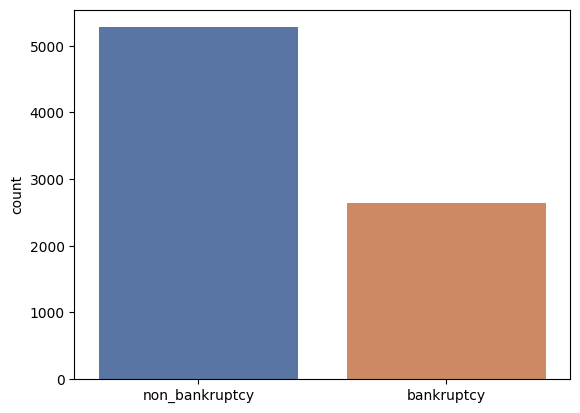

In [ ]:
smote = SMOTE(sampling_strategy = 0.5,random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ax = sns.countplot(x = y_train_smote, palette='deep');
ax.set_xticks(ticks=[0,1]);
ax.set_xticklabels(labels=['non_bankruptcy', 'bankruptcy']);

from collections import Counter
print('Original dataset shape %s' % Counter(y_train), '- Total Rows:', len(y_train))
print('Resampled dataset shape %s' % Counter(y_train_smote), '- Total Rows:', len(y_train_smote))




#Scaling

In [ ]:
s_scaler = StandardScaler()
s_scaler.fit(X_train_smote)
X_train_scaled = s_scaler.transform(X_train_smote)
X_test_scaled = s_scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

ROA(C) before interest and depreciation before interest  \
0                                              0.171416          
1                                              0.899790          
2                                              0.756388          
3                                             -0.260537          
4                                             -1.662199          
...                                                 ...          
7913                                          -0.760347          
7914                                          -0.261643          
7915                                          -1.479501          
7916                                          -0.799788          
7917                                          -1.726467          

       ROA(A) before interest and % after tax  \
0                                    0.194222   
1                                    0.944107   
2                                    0.872641   
3                                   -0.051378   
4                                   -1.560459   
...                                       ...   
7913                                -0.335709   
7914                                -0.140970   
7915                                -1.525698   
7916                                -0.629822   
7917                                -1.560459   

       ROA(B) before interest and depreciation after tax  \
0                                              0.203106    
1                                              0.729786    
2                                              0.603500    
3                                             -0.227635    
4                                             -1.672822    
...                                                 ...    
7913                                          -0.559281    
7914                                          -0.236853    
7915                                          -1.534615    
7916                                          -0.845231    
7917                                          -1.672822    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                   -0.623088                     -0.624828   
1                   -0.550474                     -0.564096   
2                    0.143403                      0.144447   
3                   -0.916910                     -0.919717   
4                    2.697703                      2.692670   
...                       ...                           ...   
7913                -0.607215                     -0.608897   
7914                -0.528221                     -0.529616   
7915                -0.988753                     -0.934158   
7916                 1.040667                      1.044969   
7917                -0.363601                     -0.364398   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                  -0.052382                    0.263363   
1                   0.292629                    0.316912   
2                   0.936279                    1.061857   
3                  -0.160894                    0.001039   
4                  -1.648290                   -1.435641   
...                      ...                         ...   
7913               -0.241547                   -0.450669   
7914                0.056471                   -0.098858   
7915               -0.348142                   -1.423683   
7916               -1.622559                   -1.380041   
7917               -0.184926                   -1.435641   

       After-tax net Interest Rate  \
0                         0.249014   
1                         0.273354   
2                         0.922178   
3                         0.003328   
4                        -1.384835   
...                            ...   
7913                     -0.349338   
7914                     -0.107993   
7915                     -1.373578   
7916                     -1.323621   
7917    

In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled

ROA(C) before interest and depreciation before interest  \
0                                              0.341049          
1                                              0.031512          
2                                              1.258293          
3                                              2.509121          
4                                             -0.602427          
...                                                 ...          
1359                                           0.014024          
1360                                          -0.034068          
1361                                           0.683813          
1362                                          -0.069918          
1363                                          -0.604176          

       ROA(A) before interest and % after tax  \
0                                    0.304943   
1                                    0.149933   
2                                    1.456444   
3                                    2.399336   
4                                   -0.547611   
...                                       ...   
1359                                 0.594831   
1360                                -0.006083   
1361                                 0.760913   
1362                                 0.142887   
1363                                -0.328181   

       ROA(B) before interest and depreciation after tax  \
0                                              0.343097    
1                                             -0.052402    
2                                              1.390583    
3                                              2.483834    
4                                             -0.696556    
...                                                 ...    
1359                                          -0.006391    
1360                                           0.007315    
1361                                           0.555531    
1362                                          -0.047507    
1363                                          -0.442027    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.391504                      0.393449   
1                   -0.596194                     -0.597836   
2                    0.247619                      0.251740   
3                    2.322525                      2.331482   
4                    2.697703                      2.692670   
...                       ...                           ...   
1359                -0.857742                     -0.859659   
1360                -0.344731                     -0.337362   
1361                -0.569300                     -0.570844   
1362                -0.795885                     -0.805000   
1363                -0.917583                     -0.920392   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.453078                    0.270141   
1                   0.121978                    0.167787   
2                   0.454933                    1.804091   
3                   2.374984                    2.050824   
4                  -1.648290                   -0.871340   
...                      ...                         ...   
1359                0.055202                    0.272852   
1360               -0.128433                   -0.076235   
1361                0.304686                    0.453158   
1362                0.029234                    0.157620   
1363               -0.668208                   -0.670699   

       After-tax net Interest Rate  \
0                         0.216306   
1                         0.112860   
2                         1.904921   
3                         1.979463   
4                        -1.348324   
...                            ...   
1359                      0.283242   
1360                     -0.003518   
1361                      0.387450   
1362                      0.157737   
1363    

#PCA

In [ ]:
pca = PCA(n_components=34,random_state=7)

X_train_pca_smote = pca.fit_transform(X_train_scaled)

X_test_pca_smote = pca.transform(X_test_scaled)

#models

##Random Forest

In [ ]:
rf_smote_model = RandomForestClassifier(random_state = 0, n_estimators = 100)
rf_smote_model.fit(X_train_pca_smote, y_train_smote)

RandomForestClassifier(random_state=0)

In [ ]:
rf_smote_y_pred = rf_smote_model.predict(X_test_pca_smote)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.45      0.30      0.36        44

    accuracy                           0.97      1364
   macro avg       0.71      0.64      0.67      1364
weighted avg       0.96      0.97      0.96      1364



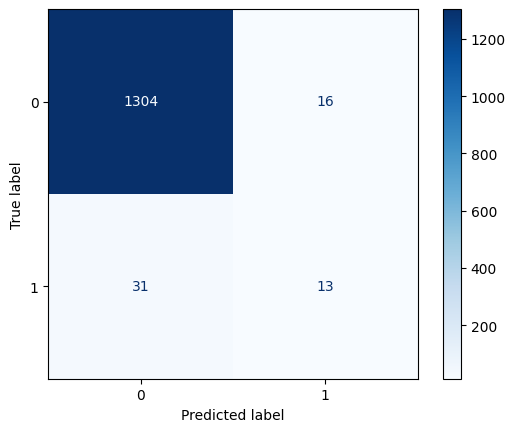

In [ ]:
print(classification_report(y_test, rf_smote_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_smote_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test, rf_smote_y_pred), 2)
f1 = round(metrics.f1_score(y_test, rf_smote_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test, rf_smote_y_pred), 2)
recall = round(metrics.recall_score(y_test,rf_smote_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,rf_smote_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)


auc 0.64
f1 0.96
precision 0.45
recall 0.3


##logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg_model_smote = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model_smote.fit(X_train_pca_smote, y_train_smote)

# Make predictions
log_smote_y_pred = logreg_model_smote.predict(X_test_pca_smote)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1320
           1       0.24      0.73      0.36        44

    accuracy                           0.92      1364
   macro avg       0.61      0.82      0.66      1364
weighted avg       0.97      0.92      0.94      1364



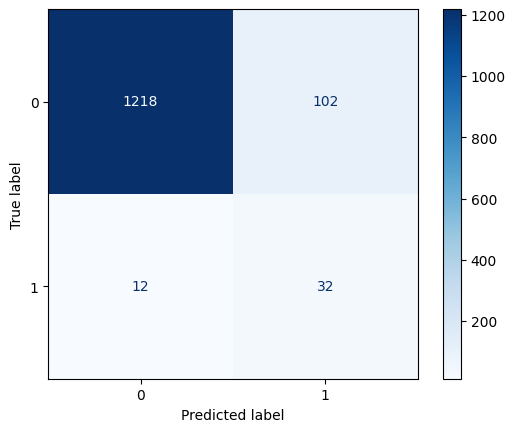

In [ ]:
print(classification_report(y_test, log_smote_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, log_smote_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,log_smote_y_pred), 2)
f1 = round(metrics.f1_score(y_test, log_smote_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,log_smote_y_pred), 2)
recall = round(metrics.recall_score(y_test,log_smote_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,log_smote_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)
print("accuracy",accuracy)

auc 0.82
f1 0.94
precision 0.24
recall 0.73
accuracy 0.92


##Adaboost

In [ ]:
# Create a weak learner (Decision Tree in this case)
base_classifier_smote = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with the weak learner
adaboost_classifier_smote= AdaBoostClassifier(base_classifier_smote, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier_smote.fit(X_train_pca_smote, y_train_smote)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
Adaboost_y_pred_smote = adaboost_classifier_smote.predict(X_test_pca_smote)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1320
           1       0.21      0.52      0.30        44

    accuracy                           0.92      1364
   macro avg       0.60      0.73      0.63      1364
weighted avg       0.96      0.92      0.94      1364



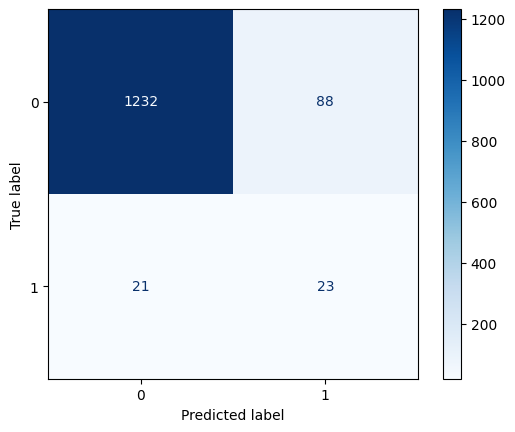

In [ ]:
print(classification_report(y_test, Adaboost_y_pred_smote))
ConfusionMatrixDisplay.from_predictions(y_test, Adaboost_y_pred_smote, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,Adaboost_y_pred_smote), 2)
f1 = round(metrics.f1_score(y_test, Adaboost_y_pred_smote, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,Adaboost_y_pred_smote), 2)
recall = round(metrics.recall_score(y_test,Adaboost_y_pred_smote), 2)
accuracy = round(metrics.accuracy_score(y_test,Adaboost_y_pred_smote), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.73
f1 0.94
precision 0.21
recall 0.52


##SVM

In [ ]:
# Create an SVM classifier
svm_classifier_smote= SVC(kernel='rbf', C=1.0, random_state=42)

# Train the SVM classifier on the training data
svm_classifier_smote.fit(X_train_pca_smote, y_train_smote)

# Make predictions on the test set
SVC_y_pred_smote = svm_classifier_smote.predict(X_test_pca_smote)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.35      0.55      0.42        44

    accuracy                           0.95      1364
   macro avg       0.67      0.76      0.70      1364
weighted avg       0.96      0.95      0.96      1364



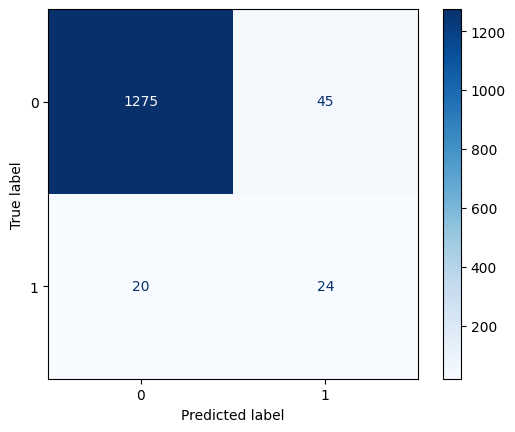

In [ ]:
print(classification_report(y_test, SVC_y_pred_smote))
ConfusionMatrixDisplay.from_predictions(y_test, SVC_y_pred_smote, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,SVC_y_pred_smote), 2)
f1 = round(metrics.f1_score(y_test, SVC_y_pred_smote, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,SVC_y_pred_smote), 2)
recall = round(metrics.recall_score(y_test,SVC_y_pred_smote), 2)
accuracy = round(metrics.accuracy_score(y_test,SVC_y_pred_smote), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.76
f1 0.96
precision 0.35
recall 0.55


##KNN

In [ ]:
# Create a KNN classifier with k=3 (you can adjust the value of k)
knn_classifier_smote = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn_classifier_smote.fit(X_train_pca_smote, y_train_smote)

# Make predictions on the test set
knn_y_pred_smote = knn_classifier_smote.predict(X_test_pca_smote)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.25      0.73      0.37        44

    accuracy                           0.92      1364
   macro avg       0.62      0.83      0.67      1364
weighted avg       0.97      0.92      0.94      1364



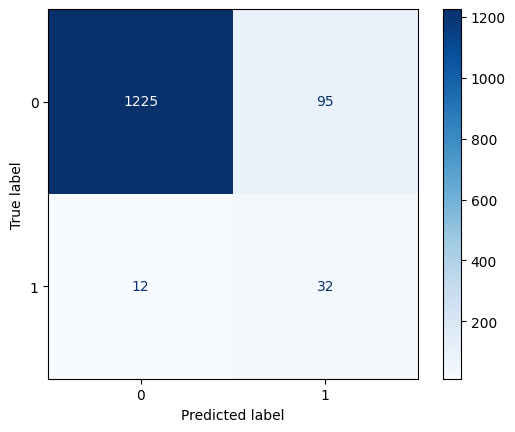

In [ ]:
print(classification_report(y_test, knn_y_pred_smote))
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred_smote, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,knn_y_pred_smote), 2)
f1 = round(metrics.f1_score(y_test, knn_y_pred_smote, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,knn_y_pred_smote), 2)
recall = round(metrics.recall_score(y_test,knn_y_pred_smote), 2)
accuracy = round(metrics.accuracy_score(y_test,knn_y_pred_smote), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.83
f1 0.94
precision 0.25
recall 0.73


##Decision Tree

In [ ]:
# Initialize the Decision Tree classifier
decision_tree_classifier_smote = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree_classifier_smote.fit(X_train_pca_smote, y_train_smote)

# Make predictions on the testing set
DT_y_pred_smote = decision_tree_classifier_smote.predict(X_test_pca_smote)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1320
           1       0.22      0.41      0.29        44

    accuracy                           0.93      1364
   macro avg       0.60      0.68      0.63      1364
weighted avg       0.96      0.93      0.94      1364



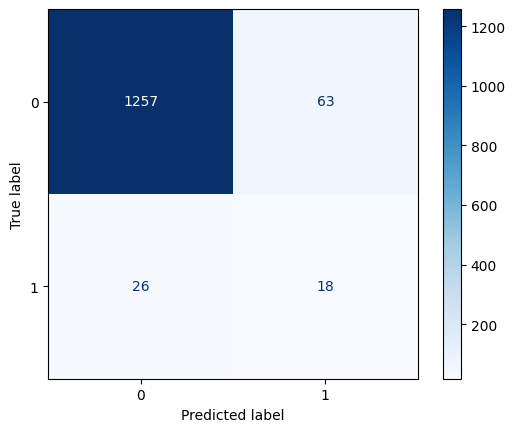

In [ ]:
print(classification_report(y_test, DT_y_pred_smote))
ConfusionMatrixDisplay.from_predictions(y_test, DT_y_pred_smote, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,DT_y_pred_smote), 2)
f1 = round(metrics.f1_score(y_test, DT_y_pred_smote, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,DT_y_pred_smote), 2)
recall = round(metrics.recall_score(y_test,DT_y_pred_smote), 2)
accuracy = round(metrics.accuracy_score(y_test,DT_y_pred_smote), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.68
f1 0.94
precision 0.22
recall 0.41


##Naive Bayes

In [ ]:
# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier_smote = GaussianNB()

# Train the model on the training set
naive_bayes_classifier_smote.fit(X_train_pca_smote, y_train_smote)

# Make predictions on the testing set
Naive_y_pred_smote = naive_bayes_classifier_smote.predict(X_test_pca_smote)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.23      0.59      0.33        44

    accuracy                           0.92      1364
   macro avg       0.61      0.76      0.64      1364
weighted avg       0.96      0.92      0.94      1364



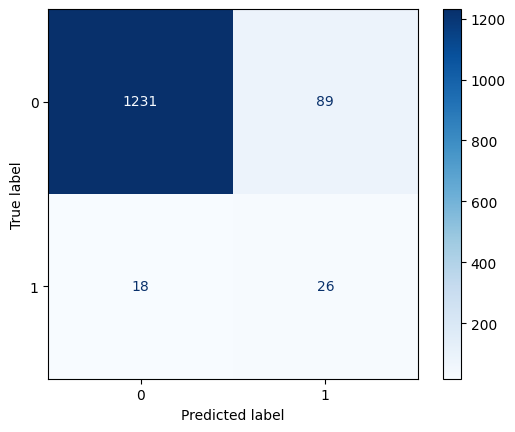

In [ ]:
print(classification_report(y_test, Naive_y_pred_smote))
ConfusionMatrixDisplay.from_predictions(y_test, Naive_y_pred_smote, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,Naive_y_pred_smote), 2)
f1 = round(metrics.f1_score(y_test, Naive_y_pred_smote, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,Naive_y_pred_smote), 2)
recall = round(metrics.recall_score(y_test,Naive_y_pred_smote), 2)
accuracy = round(metrics.accuracy_score(y_test,Naive_y_pred_smote), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.76
f1 0.94
precision 0.23
recall 0.59


##XGboost

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier_smote = xgb.XGBClassifier(learning_rate= 0.049049280704634754, max_depth= 5,n_estimators=188,subsample=  0.6369904577754233,random_state=42)

# Train the model on the training set
xgb_classifier_smote.fit(X_train_pca_smote, y_train_smote)

# Make predictions on the testing set
XG_y_pred_smote = xgb_classifier_smote.predict(X_test_pca_smote)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.35      0.59      0.44        44

    accuracy                           0.95      1364
   macro avg       0.67      0.78      0.71      1364
weighted avg       0.97      0.95      0.96      1364



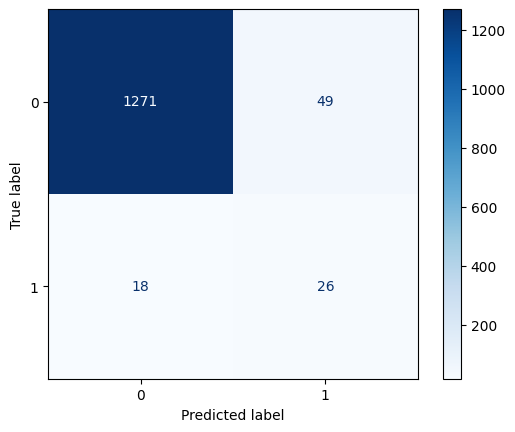

In [ ]:
print(classification_report(y_test, XG_y_pred_smote))
ConfusionMatrixDisplay.from_predictions(y_test, XG_y_pred_smote, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,XG_y_pred_smote), 2)
f1 = round(metrics.f1_score(y_test,XG_y_pred_smote, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,XG_y_pred_smote), 2)
recall = round(metrics.recall_score(y_test,XG_y_pred_smote), 2)
accuracy = round(metrics.accuracy_score(y_test,XG_y_pred_smote), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.78
f1 0.96
precision 0.35
recall 0.59


##QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Initialize Quadratic Discriminant Analysis
qda_model_smote = QuadraticDiscriminantAnalysis()

# Train the model
qda_model_smote.fit(X_train_pca_smote, y_train_smote)

# Make predictions on the test set
qda_y_pred_smote = qda_model_smote.predict(X_test_pca_smote)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1320
           1       0.24      0.73      0.36        44

    accuracy                           0.92      1364
   macro avg       0.62      0.83      0.66      1364
weighted avg       0.97      0.92      0.94      1364



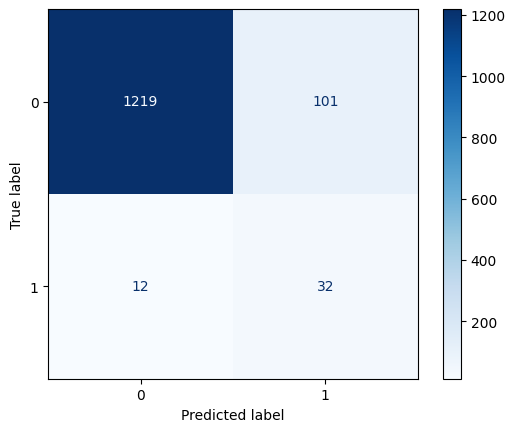

In [ ]:
print(classification_report(y_test, qda_y_pred_smote))
ConfusionMatrixDisplay.from_predictions(y_test, qda_y_pred_smote, cmap='Blues')
plt.grid(False)

In [ ]:
auc = round(metrics.roc_auc_score(y_test,qda_y_pred_smote), 2)
f1 = round(metrics.f1_score(y_test,qda_y_pred_smote, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,qda_y_pred_smote), 2)
recall = round(metrics.recall_score(y_test,qda_y_pred_smote), 2)
accuracy = round(metrics.accuracy_score(y_test,qda_y_pred_smote), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.83
f1 0.94
precision 0.24
recall 0.73


##comparison

In [ ]:
from tabulate import tabulate
from sklearn import metrics

models = [rf_smote_model,logreg_model_smote, adaboost_classifier_smote, svm_classifier_smote, knn_classifier_smote, decision_tree_classifier_smote, naive_bayes_classifier_smote, xgb_classifier_smote]
model_names = ['random forest','Logistic Regression', 'AdaBoost', 'SVM', 'KNN', 'Decision Tree', 'Naive Bayes', 'XGBoost']

results = []

for model, model_name in zip(models, model_names):
    auc = metrics.roc_auc_score(y_test, model.predict(X_test_pca_smote))
    f1 = metrics.f1_score(y_test, model.predict(X_test_pca_smote), average='weighted')
    precision = metrics.precision_score(y_test, model.predict(X_test_pca_smote))
    recall = metrics.recall_score(y_test, model.predict(X_test_pca_smote))
    accuracy = metrics.accuracy_score(y_test, model.predict(X_test_pca_smote))

    results.append([model_name, round(auc, 2), round(f1, 2), round(precision, 2), round(recall, 2), round(accuracy, 2)])

# Display the results in a table
headers = ['Model', 'AUC', 'F1', 'Precision', 'Recall', 'Accuracy']
table = tabulate(results, headers, tablefmt='grid')

print(table)


+---------------------+-------+------+-------------+----------+------------+
| Model               |   AUC |   F1 |   Precision |   Recall |   Accuracy |
+=====================+=======+======+=============+==========+============+
| random forest       |  0.64 | 0.96 |        0.45 |     0.3  |       0.97 |
+---------------------+-------+------+-------------+----------+------------+
| Logistic Regression |  0.82 | 0.94 |        0.24 |     0.73 |       0.92 |
+---------------------+-------+------+-------------+----------+------------+
| AdaBoost            |  0.73 | 0.94 |        0.21 |     0.52 |       0.92 |
+---------------------+-------+------+-------------+----------+------------+
| SVM                 |  0.76 | 0.96 |        0.35 |     0.55 |       0.95 |
+---------------------+-------+------+-------------+----------+------------+
| KNN                 |  0.83 | 0.94 |        0.25 |     0.73 |       0.92 |
+---------------------+-------+------+-------------+----------+------------+

#SMOTE EEN

In [ ]:
from imblearn.combine import SMOTEENN
# Create a SMOTE-ENN object
smote_enn = SMOTEENN(sampling_strategy = 0.5,random_state=42)

# Apply SMOTE-ENN to the training data
X_train_smoteeen, y_train_smoteeen = smote_enn.fit_resample(X_train, y_train)


In [ ]:
s_scaler = StandardScaler()
s_scaler.fit(X_train_smoteeen)
X_train_scaled_smoteeen = s_scaler.transform(X_train_smoteeen)
X_test_scaled_smoteeen = s_scaler.transform(X_test)

In [ ]:
X_train_scaled_smoteeen = pd.DataFrame(X_train_scaled_smoteeen, columns=X_train.columns)
X_train_scaled_smoteeen

ROA(C) before interest and depreciation before interest  \
0                                              0.121357          
1                                              0.841453          
2                                              0.699681          
3                                             -0.305687          
4                                             -1.691418          
...                                                 ...          
6591                                          -0.799816          
6592                                          -0.306780          
6593                                          -1.510797          
6594                                          -0.838809          
6595                                          -1.754956          

       ROA(A) before interest and % after tax  \
0                                    0.146370   
1                                    0.886990   
2                                    0.816408   
3                                   -0.096196   
4                                   -1.586632   
...                                       ...   
6591                                -0.377014   
6592                                -0.184680   
6593                                -1.552301   
6594                                -0.667493   
6595                                -1.586632   

       ROA(B) before interest and depreciation after tax  \
0                                              0.152795    
1                                              0.673419    
2                                              0.548585    
3                                             -0.272994    
4                                             -1.701563    
...                                                 ...    
6591                                          -0.600826    
6592                                          -0.282105    
6593                                          -1.564946    
6594                                          -0.883488    
6595                                          -1.701563    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                   -0.638606                     -0.640130   
1                   -0.566448                     -0.579780   
2                    0.123059                      0.124307   
3                   -0.930578                     -0.933165   
4                    2.661273                      2.656506   
...                       ...                           ...   
6591                -0.622833                     -0.624299   
6592                -0.544336                     -0.545517   
6593                -1.001968                     -0.947515   
6594                 1.014672                      1.019167   
6595                -0.380753                     -0.381338   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                  -0.088683                    0.220645   
1                   0.253898                    0.273868   
2                   0.893015                    1.014278   
3                  -0.196431                   -0.040081   
4                  -1.673353                   -1.468014   
...                      ...                         ...   
6591               -0.276516                   -0.489039   
6592                0.019403                   -0.139370   
6593               -0.382361                   -1.456128   
6594               -1.647803                   -1.412753   
6595               -0.220294                   -1.468014   

       After-tax net Interest Rate  \
0                         0.206912   
1                         0.231071   
2                         0.875048   
3                        -0.036939   
4                        -1.414733   
...                            ...   
6591                     -0.386970   
6592                     -0.147428   
6593                     -1.403560   
6594                     -1.353976   
6595    

In [ ]:
X_test_scaled_smoteeen = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_smoteeen

ROA(C) before interest and depreciation before interest  \
0                                              0.341049          
1                                              0.031512          
2                                              1.258293          
3                                              2.509121          
4                                             -0.602427          
...                                                 ...          
1359                                           0.014024          
1360                                          -0.034068          
1361                                           0.683813          
1362                                          -0.069918          
1363                                          -0.604176          

       ROA(A) before interest and % after tax  \
0                                    0.304943   
1                                    0.149933   
2                                    1.456444   
3                                    2.399336   
4                                   -0.547611   
...                                       ...   
1359                                 0.594831   
1360                                -0.006083   
1361                                 0.760913   
1362                                 0.142887   
1363                                -0.328181   

       ROA(B) before interest and depreciation after tax  \
0                                              0.343097    
1                                             -0.052402    
2                                              1.390583    
3                                              2.483834    
4                                             -0.696556    
...                                                 ...    
1359                                          -0.006391    
1360                                           0.007315    
1361                                           0.555531    
1362                                          -0.047507    
1363                                          -0.442027    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.391504                      0.393449   
1                   -0.596194                     -0.597836   
2                    0.247619                      0.251740   
3                    2.322525                      2.331482   
4                    2.697703                      2.692670   
...                       ...                           ...   
1359                -0.857742                     -0.859659   
1360                -0.344731                     -0.337362   
1361                -0.569300                     -0.570844   
1362                -0.795885                     -0.805000   
1363                -0.917583                     -0.920392   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.453078                    0.270141   
1                   0.121978                    0.167787   
2                   0.454933                    1.804091   
3                   2.374984                    2.050824   
4                  -1.648290                   -0.871340   
...                      ...                         ...   
1359                0.055202                    0.272852   
1360               -0.128433                   -0.076235   
1361                0.304686                    0.453158   
1362                0.029234                    0.157620   
1363               -0.668208                   -0.670699   

       After-tax net Interest Rate  \
0                         0.216306   
1                         0.112860   
2                         1.904921   
3                         1.979463   
4                        -1.348324   
...                            ...   
1359                      0.283242   
1360                     -0.003518   
1361                      0.387450   
1362                      0.157737   
1363    

#pca

In [ ]:
pca = PCA(n_components=34,random_state=7)

X_train_pca_smoteeen = pca.fit_transform(X_train_scaled_smoteeen)

X_test_pca_smoteeen = pca.transform(X_test_scaled_smoteeen)

##random forest

In [ ]:
rf_smoteeen_model = RandomForestClassifier(random_state = 0, n_estimators = 100)
rf_smoteeen_model.fit(X_train_pca_smoteeen, y_train_smoteeen)

RandomForestClassifier(random_state=0)

In [ ]:
rf_smoteeen_y_pred = rf_smoteeen_model.predict(X_test_pca_smoteeen)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.45      0.39      0.41        44

    accuracy                           0.96      1364
   macro avg       0.71      0.69      0.70      1364
weighted avg       0.96      0.96      0.96      1364



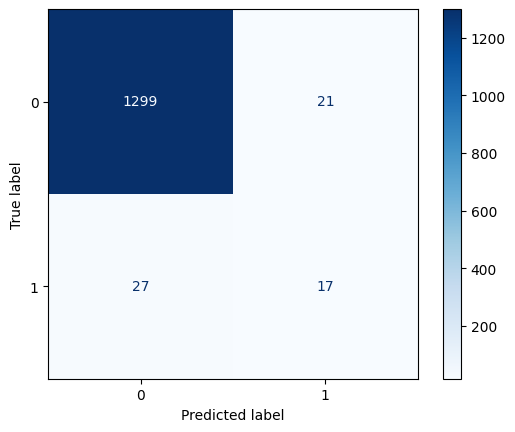

In [ ]:
print(classification_report(y_test, rf_smoteeen_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_smoteeen_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,rf_smoteeen_y_pred), 2)
f1 = round(metrics.f1_score(y_test,rf_smoteeen_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,rf_smoteeen_y_pred), 2)
recall = round(metrics.recall_score(y_test,rf_smoteeen_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,rf_smoteeen_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)
print("accuracy",accuracy)

auc 0.69
f1 0.96
precision 0.45
recall 0.39
accuracy 0.96


##logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg_model_smoteeen = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_model_smoteeen.fit(X_train_pca_smoteeen, y_train_smoteeen)

# Make predictions
log_smoteeen_y_pred = logreg_model_smoteeen.predict(X_test_pca_smoteeen)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1320
           1       0.24      0.75      0.37        44

    accuracy                           0.92      1364
   macro avg       0.62      0.84      0.66      1364
weighted avg       0.97      0.92      0.94      1364



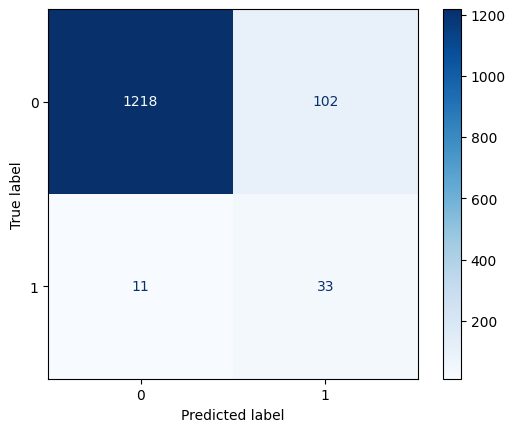

In [ ]:
print(classification_report(y_test, log_smoteeen_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, log_smoteeen_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,log_smoteeen_y_pred), 2)
f1 = round(metrics.f1_score(y_test, log_smoteeen_y_pred, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,log_smoteeen_y_pred), 2)
recall = round(metrics.recall_score(y_test,log_smoteeen_y_pred), 2)
accuracy = round(metrics.accuracy_score(y_test,log_smoteeen_y_pred), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)
print("accuracy",accuracy)

auc 0.84
f1 0.94
precision 0.24
recall 0.75
accuracy 0.92


##Adaboost

In [ ]:
# Create a weak learner (Decision Tree in this case)
base_classifier_smoteeen = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with the weak learner
adaboost_classifier_smoteeen= AdaBoostClassifier(base_classifier_smoteeen, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier_smoteeen.fit(X_train_pca_smoteeen, y_train_smoteeen)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
Adaboost_y_pred_smoteeen = adaboost_classifier_smoteeen.predict(X_test_pca_smoteeen)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.22      0.59      0.32        44

    accuracy                           0.92      1364
   macro avg       0.60      0.76      0.64      1364
weighted avg       0.96      0.92      0.94      1364



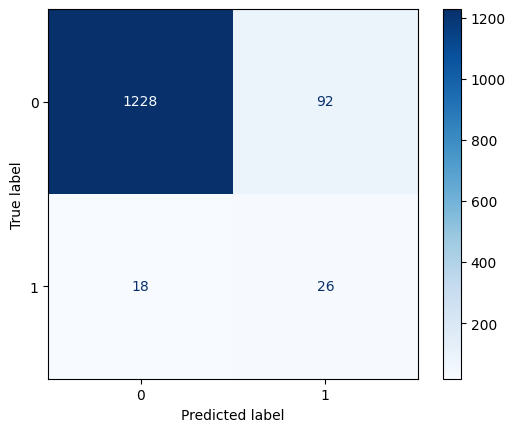

In [ ]:
print(classification_report(y_test, Adaboost_y_pred_smoteeen))
ConfusionMatrixDisplay.from_predictions(y_test, Adaboost_y_pred_smoteeen, cmap='Blues')
plt.grid(False)


In [ ]:
auc = round(metrics.roc_auc_score(y_test,Adaboost_y_pred_smoteeen), 2)
f1 = round(metrics.f1_score(y_test,Adaboost_y_pred_smoteeen, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,Adaboost_y_pred_smoteeen), 2)
recall = round(metrics.recall_score(y_test,Adaboost_y_pred_smoteeen), 2)
accuracy = round(metrics.accuracy_score(y_test,Adaboost_y_pred_smoteeen), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)
print("accuracy",accuracy)

auc 0.76
f1 0.94
precision 0.22
recall 0.59
accuracy 0.92


##SVM

In [ ]:
# Create an SVM classifier
svm_classifier_smoteeen= SVC(kernel='rbf', C=1.0, random_state=42)

# Train the SVM classifier on the training data
svm_classifier_smoteeen.fit(X_train_pca_smoteeen, y_train_smoteeen)

# Make predictions on the test set
SVC_y_pred_smoteeen = svm_classifier_smoteeen.predict(X_test_pca_smoteeen)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1320
           1       0.32      0.55      0.40        44

    accuracy                           0.95      1364
   macro avg       0.65      0.75      0.69      1364
weighted avg       0.96      0.95      0.95      1364



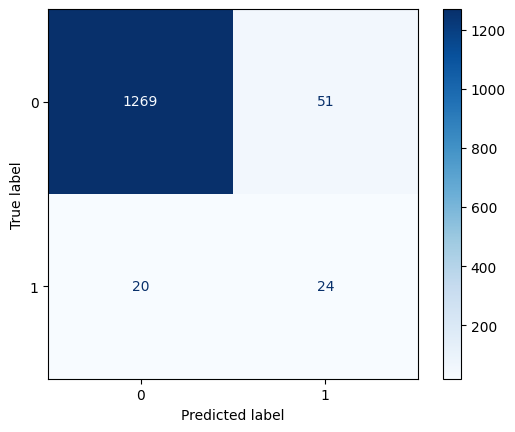

In [ ]:
print(classification_report(y_test, SVC_y_pred_smoteeen))
ConfusionMatrixDisplay.from_predictions(y_test, SVC_y_pred_smoteeen, cmap='Blues')
plt.grid(False)

In [ ]:
auc = round(metrics.roc_auc_score(y_test,SVC_y_pred_smoteeen), 2)
f1 = round(metrics.f1_score(y_test,SVC_y_pred_smoteeen, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,SVC_y_pred_smoteeen), 2)
recall = round(metrics.recall_score(y_test,SVC_y_pred_smoteeen), 2)
accuracy = round(metrics.accuracy_score(y_test,SVC_y_pred_smoteeen), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.75
f1 0.95
precision 0.32
recall 0.55


##Decision Tree

In [ ]:
# Initialize the Decision Tree classifier
decision_tree_classifier_smoteeen = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree_classifier_smoteeen.fit(X_train_pca_smoteeen, y_train_smoteeen)

# Make predictions on the testing set
DT_y_pred_smoteeen = decision_tree_classifier_smoteeen.predict(X_test_pca_smoteeen)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1320
           1       0.15      0.39      0.22        44

    accuracy                           0.91      1364
   macro avg       0.57      0.66      0.59      1364
weighted avg       0.95      0.91      0.93      1364



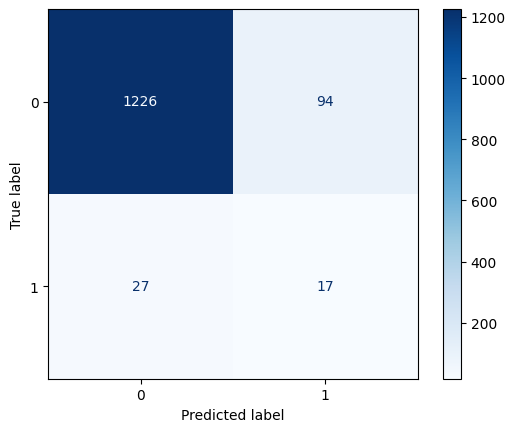

In [ ]:
print(classification_report(y_test,DT_y_pred_smoteeen))
ConfusionMatrixDisplay.from_predictions(y_test,DT_y_pred_smoteeen, cmap='Blues')
plt.grid(False)

In [ ]:
auc = round(metrics.roc_auc_score(y_test,DT_y_pred_smoteeen), 2)
f1 = round(metrics.f1_score(y_test,DT_y_pred_smoteeen, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,DT_y_pred_smoteeen), 2)
recall = round(metrics.recall_score(y_test,DT_y_pred_smoteeen), 2)
accuracy = round(metrics.accuracy_score(y_test,DT_y_pred_smoteeen), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.66
f1 0.93
precision 0.15
recall 0.39


##Naive Bayes

In [ ]:
# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier_smoteeen = GaussianNB()

# Train the model on the training set
naive_bayes_classifier_smoteeen.fit(X_train_pca_smoteeen, y_train_smoteeen)

# Make predictions on the testing set
Naive_y_pred_smoteeen = naive_bayes_classifier_smoteeen.predict(X_test_pca_smoteeen)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1320
           1       0.25      0.64      0.36        44

    accuracy                           0.93      1364
   macro avg       0.62      0.79      0.66      1364
weighted avg       0.96      0.93      0.94      1364



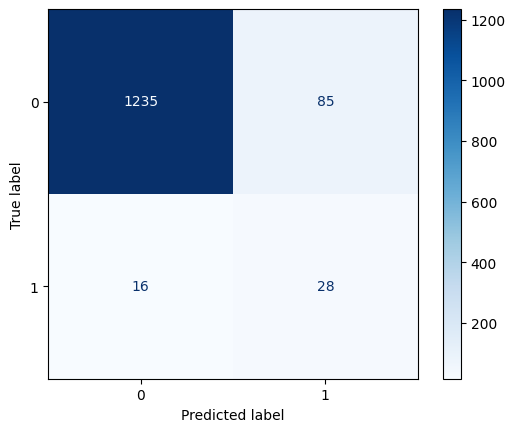

In [ ]:
print(classification_report(y_test, Naive_y_pred_smoteeen))
ConfusionMatrixDisplay.from_predictions(y_test, Naive_y_pred_smoteeen, cmap='Blues')
plt.grid(False)

In [ ]:
auc = round(metrics.roc_auc_score(y_test,Naive_y_pred_smoteeen), 2)
f1 = round(metrics.f1_score(y_test,Naive_y_pred_smoteeen, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,Naive_y_pred_smoteeen), 2)
recall = round(metrics.recall_score(y_test,Naive_y_pred_smoteeen), 2)
accuracy = round(metrics.accuracy_score(y_test,Naive_y_pred_smoteeen), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)

auc 0.79
f1 0.94
precision 0.25
recall 0.64


##QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Initialize Quadratic Discriminant Analysis
qda_model_smoteeen = QuadraticDiscriminantAnalysis()

# Train the model
qda_model_smoteeen.fit(X_train_pca_smoteeen, y_train_smoteeen)

# Make predictions on the test set
qda_y_pred_smoteeen = qda_model_smoteeen.predict(X_test_pca_smoteeen)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1320
           1       0.24      0.77      0.37        44

    accuracy                           0.92      1364
   macro avg       0.62      0.85      0.66      1364
weighted avg       0.97      0.92      0.94      1364



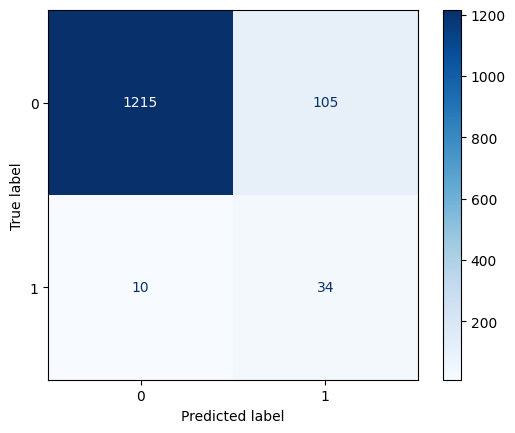

In [ ]:
print(classification_report(y_test, qda_y_pred_smoteeen))
ConfusionMatrixDisplay.from_predictions(y_test, qda_y_pred_smoteeen, cmap='Blues')
plt.grid(False)

In [ ]:
auc = round(metrics.roc_auc_score(y_test,qda_y_pred_smoteeen), 2)
f1 = round(metrics.f1_score(y_test,qda_y_pred_smoteeen, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,qda_y_pred_smoteeen), 2)
recall = round(metrics.recall_score(y_test,qda_y_pred_smoteeen), 2)
accuracy = round(metrics.accuracy_score(y_test,qda_y_pred_smoteeen), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)
print("accuracy",accuracy)

auc 0.85
f1 0.94
precision 0.24
recall 0.77
accuracy 0.92


##kNN

In [ ]:
# Create a KNN classifier with k=3 (you can adjust the value of k)
knn_classifier_smoteeen = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn_classifier_smoteeen.fit(X_train_pca_smoteeen, y_train_smoteeen)

# Make predictions on the test set
knn_y_pred_smoteeen = knn_classifier_smoteeen.predict(X_test_pca_smoteeen)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1320
           1       0.22      0.70      0.34        44

    accuracy                           0.91      1364
   macro avg       0.61      0.81      0.65      1364
weighted avg       0.96      0.91      0.93      1364



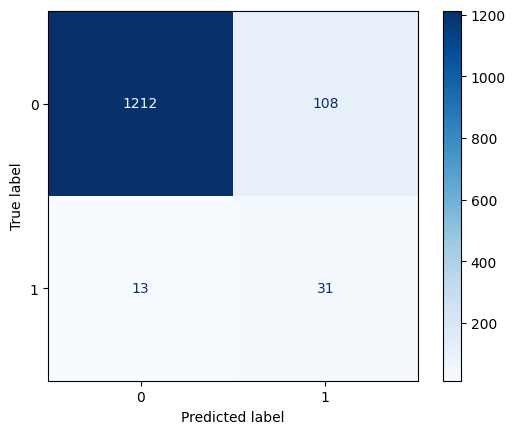

In [ ]:
print(classification_report(y_test, knn_y_pred_smoteeen))
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred_smoteeen, cmap='Blues')
plt.grid(False)

In [ ]:
auc = round(metrics.roc_auc_score(y_test,knn_y_pred_smoteeen), 2)
f1 = round(metrics.f1_score(y_test, knn_y_pred_smoteeen, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,knn_y_pred_smoteeen), 2)
recall = round(metrics.recall_score(y_test,knn_y_pred_smoteeen), 2)
accuracy = round(metrics.accuracy_score(y_test,knn_y_pred_smoteeen), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)
print("accuracy",accuracy)

auc 0.81
f1 0.93
precision 0.22
recall 0.7
accuracy 0.91


##XGboost

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier_smoteeen = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_classifier_smoteeen.fit(X_train_pca_smoteeen, y_train_smoteeen)

# Make predictions on the testing set
XG_y_pred_smoteeen = xgb_classifier_smoteeen.predict(X_test_pca_smoteeen)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.41      0.48      0.44        44

    accuracy                           0.96      1364
   macro avg       0.70      0.73      0.71      1364
weighted avg       0.96      0.96      0.96      1364



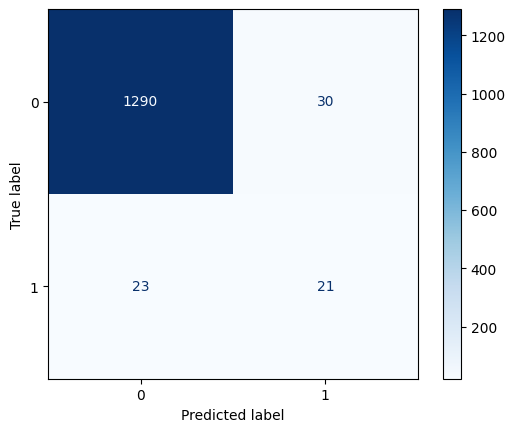

In [ ]:
print(classification_report(y_test, XG_y_pred_smoteeen))
ConfusionMatrixDisplay.from_predictions(y_test,XG_y_pred_smoteeen, cmap='Blues')
plt.grid(False)

In [ ]:
auc = round(metrics.roc_auc_score(y_test,XG_y_pred_smoteeen), 2)
f1 = round(metrics.f1_score(y_test, XG_y_pred_smoteeen, average='weighted'), 2)
precision = round(metrics.precision_score(y_test,XG_y_pred_smoteeen), 2)
recall = round(metrics.recall_score(y_test,XG_y_pred_smoteeen), 2)
accuracy = round(metrics.accuracy_score(y_test,XG_y_pred_smoteeen), 2)
print("auc",auc)
print("f1",f1)
print("precision",precision)
print("recall",recall)
print("accuracy",accuracy)

auc 0.73
f1 0.96
precision 0.41
recall 0.48
accuracy 0.96


##comparison

In [ ]:
from tabulate import tabulate
from sklearn import metrics

models = [rf_smoteeen_model,svm_classifier_smoteeen,adaboost_classifier_smoteeen,decision_tree_classifier_smoteeen,naive_bayes_classifier_smoteeen,logreg_model_smoteeen,knn_classifier_smoteeen, xgb_classifier_smoteeen,qda_model_smoteeen]
model_names = ['random forest','SVM','adaboost','Decision Tree','naive bayes','Logistic Regression','KNN','XGBoost',"qda"]

results = []

for model, model_name in zip(models, model_names):
    #auc = metrics.roc_auc_score(y_test, model.predict(X_test_pca_smoteeen))
    f1 = metrics.f1_score(y_test, model.predict(X_test_pca_smoteeen), average='weighted')
    precision = metrics.precision_score(y_test, model.predict(X_test_pca_smoteeen))
    recall = metrics.recall_score(y_test, model.predict(X_test_pca_smoteeen))
    accuracy = metrics.accuracy_score(y_test, model.predict(X_test_pca_smoteeen))

    results.append([model_name, round(auc, 2), round(f1, 2), round(precision, 2), round(recall, 2), round(accuracy, 2)])

# Display the results in a table
headers = ['Model', 'AUC', 'F1', 'Precision', 'Recall', 'Accuracy']
table = tabulate(results, headers, tablefmt='grid')

print(table)

+---------------------+-------+------+-------------+----------+------------+
| Model               |   AUC |   F1 |   Precision |   Recall |   Accuracy |
+=====================+=======+======+=============+==========+============+
| random forest       |  0.73 | 0.96 |        0.45 |     0.39 |       0.96 |
+---------------------+-------+------+-------------+----------+------------+
| SVM                 |  0.73 | 0.95 |        0.32 |     0.55 |       0.95 |
+---------------------+-------+------+-------------+----------+------------+
| adaboost            |  0.73 | 0.94 |        0.22 |     0.59 |       0.92 |
+---------------------+-------+------+-------------+----------+------------+
| Decision Tree       |  0.73 | 0.93 |        0.15 |     0.39 |       0.91 |
+---------------------+-------+------+-------------+----------+------------+
| naive bayes         |  0.73 | 0.94 |        0.25 |     0.64 |       0.93 |
+---------------------+-------+------+-------------+----------+------------+

#HYPER PARMETER TUNING

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from scipy.stats import uniform, loguniform

# Assuming X and y are your data and labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'C': loguniform(1e-5, 1e5),  # Regularization parameter
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

# Instantiate Logistic Regression model
logreg = LogisticRegression()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, scoring='accuracy', n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Perform the Randomized Search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

# Predict on the test set with the best model
y_test_pred = random_search.predict(X_test)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_test_pred)
print("F1 Score on Test Set:", f1_test)


Best Hyperparameters: {'C': 0.05564180225431373, 'penalty': 'l1', 'solver': 'liblinear'}
F1 Score on Test Set: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg_model = LogisticRegression(C= 0.05564180225431373, penalty='l1',solver='liblinear',random_state=42)

# Train the model
logreg_model.fit(X_train_pca , y_train)

# Make predictions
log_y_pred = logreg_model.predict(X_test_pca)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.67      0.14      0.23        44

    accuracy                           0.97      1364
   macro avg       0.82      0.57      0.61      1364
weighted avg       0.96      0.97      0.96      1364



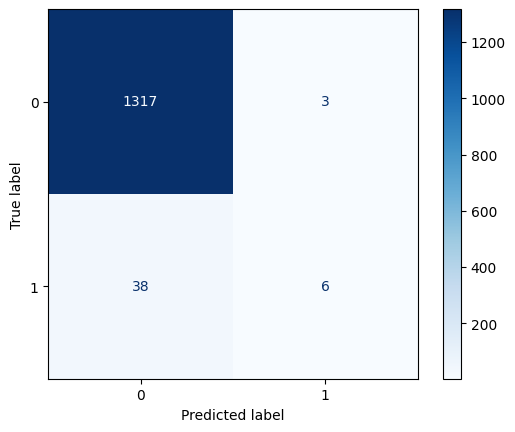

In [ ]:
print(classification_report(y_test, log_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, log_y_pred, cmap='Blues')
plt.grid(False)


In [ ]:
print("ended")

ended
